# Installing and importing required modules

In [1]:
#!pip install pandas
#!pip install numpy
!pip install regex
!pip install nltk
!pip install sklearn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel
!pip install ClusterEnsembles

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
import random
import nltk
import multiprocessing
import umap.umap_ as umap
import umap.plot
import re
import string
import warnings
from tabulate import tabulate
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.datasets import make_classification, fetch_20newsgroups
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.optimize import linear_sum_assignment
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from joblib import Memory
from tempfile import mkdtemp
from string import punctuation
from nltk import pos_tag, word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import joblib
import hdbscan

np.random.seed(0)
random.seed(0)

zsh:1: no matches found: umap-learn[plot]
  Using cached ClusterEnsembles-1.0.0-py3-none-any.whl (8.6 kB)
  Using cached PyMetis-2020.1.tar.gz (297 kB)
  Using cached ClusterEnsembles-0.2.7-py3-none-any.whl (8.5 kB)
ERROR: Cannot install clusterensembles==0.2.7 and clusterensembles==1.0.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    clusterensembles 1.0.0 depends on kahypar>=1.1.3
    clusterensembles 0.2.7 depends on kahypar>=1.1.3

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/user_guide/#fixing-conflicting-dependencies


/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/umap/plot.py:66: UserWarning: Trying to register the cmap 'fire' which already exists.
  plt.register_cmap("fire", fire_cmap)


In [2]:
import plotmat
from plotmat import plot_mat

In [3]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
dataset = fetch_20newsgroups(subset = 'all', categories = categories,shuffle = True, random_state = 0,remove=('headers','footers'))

In [4]:
data = pd.DataFrame(dataset.data)
data.head()

0
0  In article <mssC5y5u0.4Dn@netcom.com> mss@netc...
1  In article <C5JoIt.E31@bcstec.ca.boeing.com>, ...
2  HELP, PROBLEM 486/33MHZ HANGS IN EXTENDED MODE...
3  CALL FOR PRESENTATIONS\n\t\n      NAVY SCIENTI...
4  In article <mcbride.126@ohsu.edu> mcbride@ohsu...

# Question 1

Report the dimensions of the TF-IDF matrix you obtain.

In [6]:
count_vec = CountVectorizer(stop_words="english", min_df=3)
tfidf_tranformer = TfidfTransformer(use_idf=True)

word_count_vec = count_vec.fit_transform(dataset.data)
word_count_vec_tf = tfidf_tranformer.fit_transform(word_count_vec)
word_count_array = word_count_vec_tf.toarray()
word_counts = pd.DataFrame(data=word_count_array, columns = count_vec.get_feature_names())

y_output = []
for label in dataset.target:
    if(label < 4):
        y_output.append(0)
    else:
        y_output.append(1)

print(word_counts.shape)

(7882, 23522)


# QUESTION 2: 

Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix. Does the contingency matrix have to be square-shaped?

In [8]:
kmeans = KMeans(init='k-means++', max_iter=1000, n_clusters=2, n_init=30, random_state=0)
kmeans.fit(word_counts)


KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

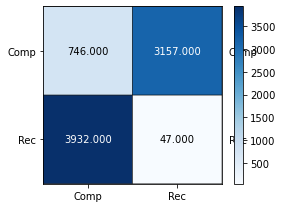

In [8]:
plot_mat(contingency_matrix(y_output, kmeans.labels_), size = (4,3), xticklabels = ['Comp','Rec'],yticklabels = ['Comp','Rec'])

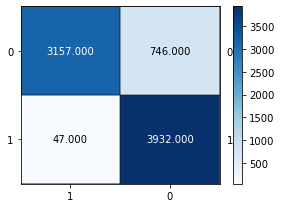

In [12]:
cm = confusion_matrix(y_output, kmeans.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(4,3))

# QUESTION 3: 

Report the 5 clustering measures explained in the introduction for K- means clustering.

In [9]:
def Clustering_Metrics(y_test, y_pred, name=""):
    print("Homogeneity score for %s: %f" %(name, homogeneity_score(y_test, y_pred)))
    print("Completeness score for %s: %f" % (name, completeness_score(y_test, y_pred)))
    print("V-measure score for %s: %f" % (name, v_measure_score(y_test, y_pred)))
    print("Adjusted Rand Index score for %s: %f" % (name, adjusted_rand_score(y_test, y_pred)))
    print("Adjusted mutual information score for %s: %f" % (name, adjusted_mutual_info_score(y_test, y_pred)))

In [10]:
Clustering_Metrics(y_output, kmeans.labels_)

Homogeneity score for : 0.579400
Completeness score for : 0.594446
V-measure score for : 0.586826
Adjusted Rand Index score for : 0.638007
Adjusted mutual information score for : 0.586788


# QUESTION 4: 

Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.

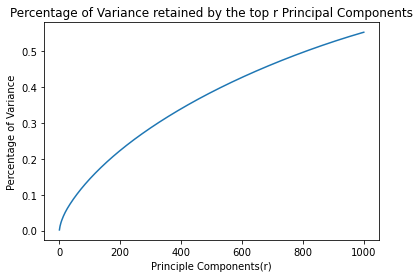

In [11]:
svd_t = TruncatedSVD(n_components=1000, random_state=42)
svd_t.fit(word_counts)

x_axis = np.linspace(1, 1000, 1000)
y_axis = np.cumsum(svd_t.explained_variance_ratio_)

plt.plot(x_axis, y_axis)
plt.title('Percentage of Variance retained by the top r Principal Components')
plt.ylabel('Percentage of Variance')
plt.xlabel('Principle Components(r)')
plt.show()

# QUESTION 5:

Let r be the dimension that we want to reduce the data to (i.e. n components).
Try r = 1,2,3,5,10,20,50,100,300, and plot the 5 measure scores v.s. r for both
SVD and NMF.
Report a good choice of r for SVD and NMF respectively.

In [13]:
components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
svd_hs = []
svd_cs = []
svd_vms = []
svd_aris = []
svd_amis = []

nmf_hs = []
nmf_cs = []
nmf_vms = []
nmf_aris = []
nmf_amis = []

for r in components:
    print(r)
    svd_t = TruncatedSVD(n_components=r, random_state=42)
    words_count_svd = svd_t.fit_transform(word_counts)
    kmeans.fit(words_count_svd)

    svd_hs.append(homogeneity_score(y_output, kmeans.labels_))
    svd_cs.append(completeness_score(y_output, kmeans.labels_))
    svd_vms.append(v_measure_score(y_output, kmeans.labels_))
    svd_aris.append(adjusted_rand_score(y_output, kmeans.labels_))
    svd_amis.append(adjusted_mutual_info_score(y_output, kmeans.labels_))

    nmf = NMF(n_components=r, init='random', random_state=42, max_iter=1000)
    words_count_nmf = nmf.fit_transform(word_counts)
    kmeans.fit(words_count_nmf)

    nmf_hs.append(homogeneity_score(y_output, kmeans.labels_))
    nmf_cs.append(completeness_score(y_output, kmeans.labels_))
    nmf_vms.append(v_measure_score(y_output, kmeans.labels_))
    nmf_aris.append(adjusted_rand_score(y_output, kmeans.labels_))
    nmf_amis.append(adjusted_mutual_info_score(y_output, kmeans.labels_))

1
2
3
5
10
20
50
100
300


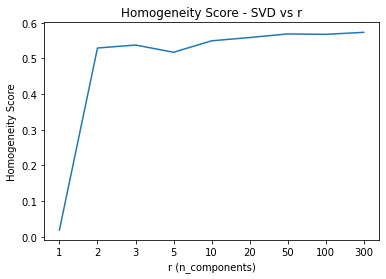

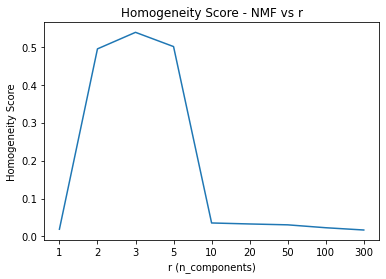

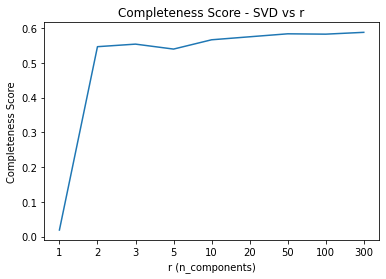

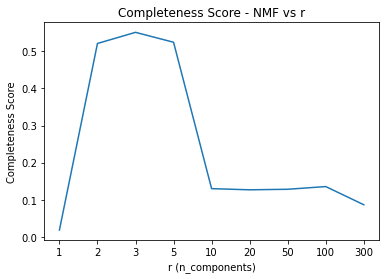

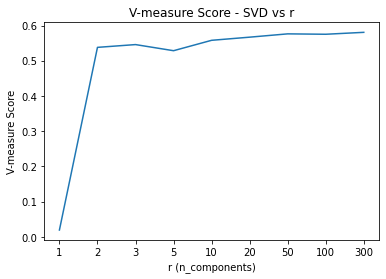

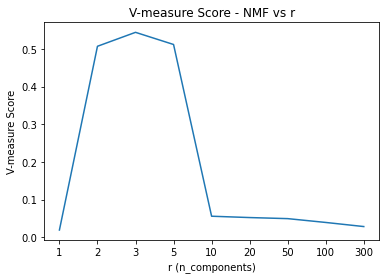

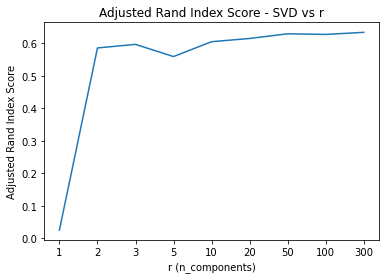

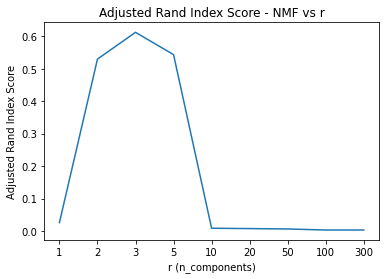

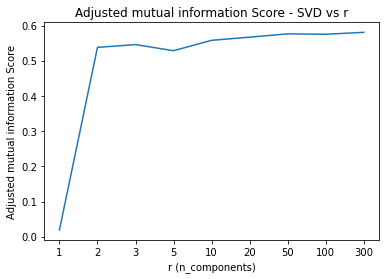

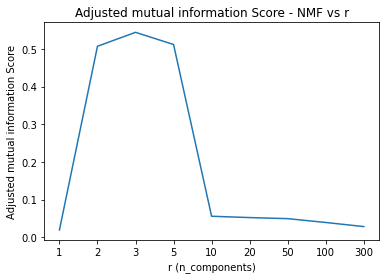

In [14]:
componentsStr = ["1", "2", "3", "5", "10", "20", "50", "100", "300"]
# Homogeneity Score
plt.plot(componentsStr, svd_hs)
plt.title('Homogeneity Score - SVD vs r')
plt.ylabel('Homogeneity Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(componentsStr, nmf_hs)
plt.title('Homogeneity Score - NMF vs r')
plt.ylabel('Homogeneity Score')
plt.xlabel('r (n_components)')
plt.show()

# Completeness Score
plt.plot(componentsStr, svd_cs)
plt.title('Completeness Score - SVD vs r')
plt.ylabel('Completeness Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(componentsStr, nmf_cs)
plt.title('Completeness Score - NMF vs r')
plt.ylabel('Completeness Score')
plt.xlabel('r (n_components)')
plt.show()

# V-measure Score
plt.plot(componentsStr, svd_vms)
plt.title('V-measure Score - SVD vs r')
plt.ylabel('V-measure Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(componentsStr, nmf_vms)
plt.title('V-measure Score - NMF vs r')
plt.ylabel('V-measure Score')
plt.xlabel('r (n_components)')
plt.show()

# Adjusted Rand Index Score
plt.plot(componentsStr, svd_aris)
plt.title('Adjusted Rand Index Score - SVD vs r')
plt.ylabel('Adjusted Rand Index Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(componentsStr, nmf_aris)
plt.title('Adjusted Rand Index Score - NMF vs r')
plt.ylabel('Adjusted Rand Index Score')
plt.xlabel('r (n_components)')
plt.show()

# Adjusted mutual information Score
plt.plot(componentsStr, svd_amis)
plt.title('Adjusted mutual information Score - SVD vs r')
plt.ylabel('Adjusted mutual information Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(componentsStr, nmf_amis)
plt.title('Adjusted mutual information Score - NMF vs r')
plt.ylabel('Adjusted mutual information Score')
plt.xlabel('r (n_components)')
plt.show()

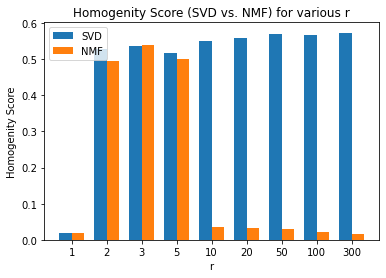

In [17]:
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(componentsStr)) - width/2, svd_hs, width, label='SVD')
rects2 = ax.bar(np.arange(len(componentsStr)) + width/2, nmf_hs, width, label='NMF')
ax.set_ylabel('Homogenity Score')
ax.set_title('Homogenity Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(componentsStr)))
ax.set_xticklabels(componentsStr)
ax.set_xlabel('r')
ax.legend()
plt.show()

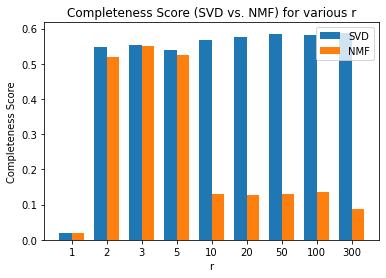

In [18]:
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(componentsStr)) - width/2, svd_cs, width, label='SVD')
rects2 = ax.bar(np.arange(len(componentsStr)) + width/2, nmf_cs, width, label='NMF')
ax.set_ylabel('Completeness Score')
ax.set_title('Completeness Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(componentsStr)))
ax.set_xticklabels(componentsStr)
ax.set_xlabel('r')
ax.legend()
plt.show()

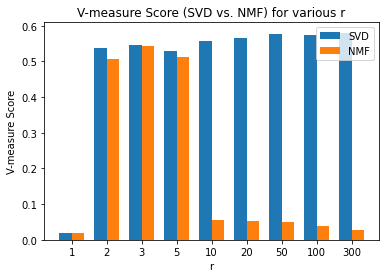

In [19]:
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(componentsStr)) - width/2, svd_vms, width, label='SVD')
rects2 = ax.bar(np.arange(len(componentsStr)) + width/2, nmf_vms, width, label='NMF')
ax.set_ylabel('V-measure Score')
ax.set_title('V-measure Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(componentsStr)))
ax.set_xticklabels(componentsStr)
ax.set_xlabel('r')
ax.legend()
plt.show()

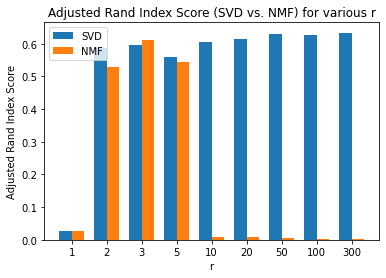

In [20]:
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(componentsStr)) - width/2, svd_aris, width, label='SVD')
rects2 = ax.bar(np.arange(len(componentsStr)) + width/2, nmf_aris, width, label='NMF')
ax.set_ylabel('Adjusted Rand Index Score')
ax.set_title('Adjusted Rand Index Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(componentsStr)))
ax.set_xticklabels(componentsStr)
ax.set_xlabel('r')
ax.legend()
plt.show()

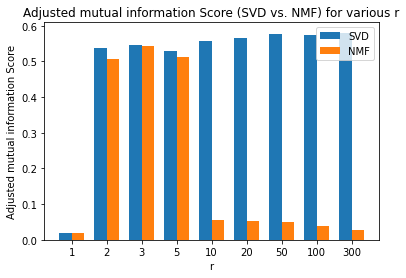

In [21]:
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(componentsStr)) - width/2, svd_amis, width, label='SVD')
rects2 = ax.bar(np.arange(len(componentsStr)) + width/2, nmf_amis, width, label='NMF')
ax.set_ylabel('Adjusted mutual information Score')
ax.set_title('Adjusted mutual information Score (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(componentsStr)))
ax.set_xticklabels(componentsStr)
ax.set_xlabel('r')
ax.legend()
plt.show()

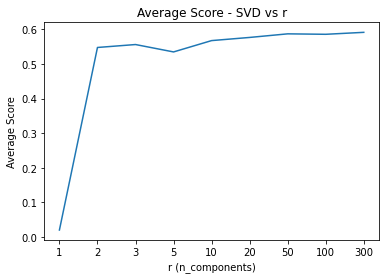

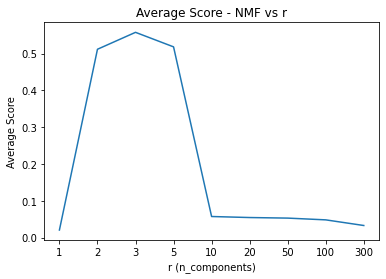

Best in terms of Average score - SVD
Best r for SVD: 300
Best Score:0.5912913300386178
Best in terms of Average score - NMF
Best r for NMF: 3
Best Score:0.5578767772563564
Best in terms of Average Rand Index score - SVD
300
Best Score:0.6335553979860815
Best in terms of Average Rand Index score - NMF
3
Best Score:0.6123239707892058


In [24]:
def get_max_index(mat):
    return np.unravel_index(np.argmax(mat, axis=None), mat.shape)

bestSVD = 0
bestNMF = 0
avgSVD = []
avgNMF = []

for i in range(len(components)):
    avgSVD.append((svd_hs[i] + svd_cs[i] + svd_aris[i] + svd_amis[i] + svd_vms[i]) / 5)
    avgNMF.append((nmf_hs[i] + nmf_cs[i] + nmf_aris[i] + nmf_amis[i] + nmf_vms[i]) / 5)
    if(avgSVD[i] > bestSVD):
        bestSVD = avgSVD[i]
        bestrSVD = components[i]

    if(avgNMF[i] > bestNMF):
        bestNMF = avgNMF[i]
        bestrNMF = components[i]

plt.plot(componentsStr, avgSVD)
plt.title('Average Score - SVD vs r')
plt.ylabel('Average Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(componentsStr, avgNMF)
plt.title('Average Score - NMF vs r')
plt.ylabel('Average Score')
plt.xlabel('r (n_components)')
plt.show()

print('Best in terms of Average score - SVD')
svd_array_np = np.array(avgSVD)
print('Best r for SVD: ' + str(bestrSVD))
print('Best Score:' + str(svd_array_np.max()))

print('Best in terms of Average score - NMF')
nmf_array_np = np.array(avgNMF)
print('Best r for NMF: ' + str(bestrNMF))
print('Best Score:' + str(nmf_array_np.max()))

print('Best in terms of Average Rand Index score - SVD')
svd_array_np = np.array(svd_aris)
(i,) = get_max_index(svd_array_np)
print(components[i])
print('Best Score:' + str(svd_array_np.max()))

print('Best in terms of Average Rand Index score - NMF')
nmf_array_np = np.array(nmf_aris)
(i,) = get_max_index(nmf_array_np)
print(components[i])
print('Best Score:' + str(nmf_array_np.max()))

# QUESTION 8: 

Visualize the clustering results for:
5
• SVD with your optimal choice of r for K-Means clustering;
• NMF with your choice of r for K-Means clustering.

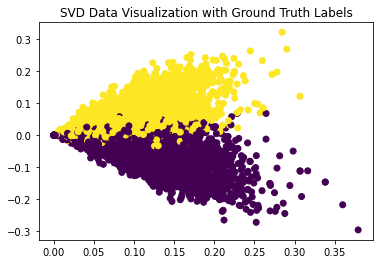

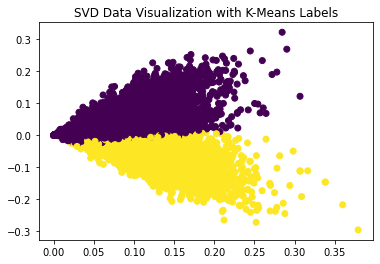

Homogeneity score for : 0.573359
Completeness score for : 0.588206
V-measure score for : 0.580688
Adjusted Rand Index score for : 0.633555
Adjusted mutual information score for : 0.580649


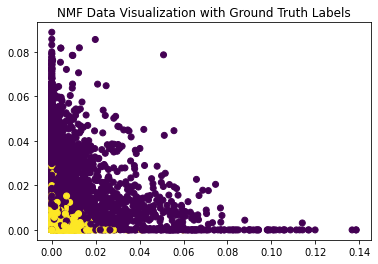

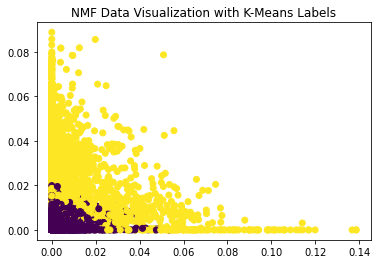

Homogeneity score for : 0.538405
Completeness score for : 0.550210
V-measure score for : 0.544244
Adjusted Rand Index score for : 0.612324
Adjusted mutual information score for : 0.544201


In [10]:
# Best is 300
svd_t = TruncatedSVD(n_components=300, random_state=42)
words_count_svd = svd_t.fit_transform(word_counts)
kmeans.fit(words_count_svd)

plt.scatter(words_count_svd[:,0], words_count_svd[:,1], c = y_output)
plt.title("SVD Data Visualization with Ground Truth Labels")
plt.show()
plt.scatter(words_count_svd[:,0],words_count_svd[:,1],c = kmeans.labels_)
plt.title("SVD Data Visualization with K-Means Labels")
plt.show()

Clustering_Metrics(y_output, kmeans.labels_)

nmf = NMF(n_components=3, init='random', random_state=42, max_iter=1000)
words_count_nmf = nmf.fit_transform(word_counts)
kmeans.fit(words_count_nmf)

plt.scatter(words_count_nmf[:,0], words_count_nmf[:,1], c = y_output)
plt.title("NMF Data Visualization with Ground Truth Labels")
plt.show()
plt.scatter(words_count_nmf[:,0],words_count_nmf[:,1],c = kmeans.labels_)
plt.title("NMF Data Visualization with K-Means Labels")
plt.show()

Clustering_Metrics(y_output, kmeans.labels_)

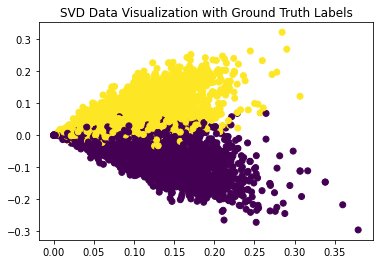

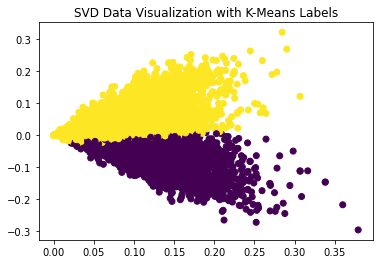

Homogeneity score for : 0.568952
Completeness score for : 0.583977
V-measure score for : 0.576367
Adjusted Rand Index score for : 0.629119
Adjusted mutual information score for : 0.576327


In [11]:
# N_Components 50
svd_t = TruncatedSVD(n_components=50, random_state=42)
words_count_svd = svd_t.fit_transform(word_counts)
kmeans.fit(words_count_svd)

plt.scatter(words_count_svd[:,0], words_count_svd[:,1], c = y_output)
plt.title("SVD Data Visualization with Ground Truth Labels")
plt.show()
plt.scatter(words_count_svd[:,0],words_count_svd[:,1],c = kmeans.labels_)
plt.title("SVD Data Visualization with K-Means Labels")
plt.show()

Clustering_Metrics(y_output, kmeans.labels_)

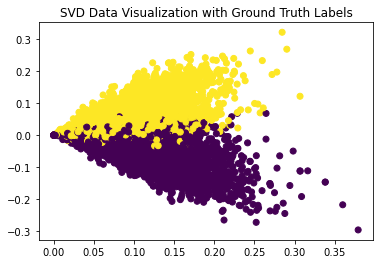

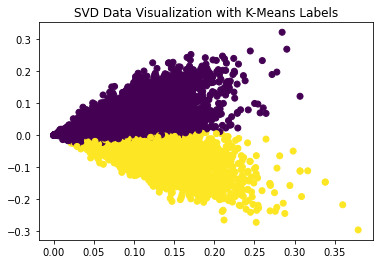

Homogeneity score for : 0.573359
Completeness score for : 0.588206
V-measure score for : 0.580688
Adjusted Rand Index score for : 0.633555
Adjusted mutual information score for : 0.580649


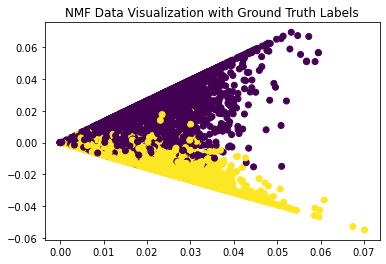

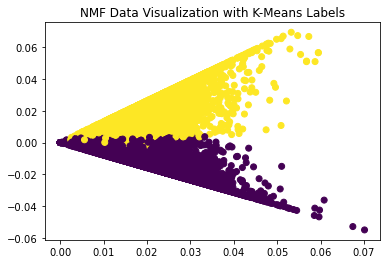

Homogeneity score for : 0.538405
Completeness score for : 0.550210
V-measure score for : 0.544244
Adjusted Rand Index score for : 0.612324
Adjusted mutual information score for : 0.544201


In [12]:
svd_2 = TruncatedSVD(n_components=2, random_state=42)

# Best is 300
svd_t = TruncatedSVD(n_components=300, random_state=42)
words_count_int = svd_t.fit_transform(word_counts)
words_count_svd = svd_2.fit_transform(words_count_int)
kmeans.fit(words_count_int)

plt.scatter(words_count_svd[:,0], words_count_svd[:,1], c = y_output)
plt.title("SVD Data Visualization with Ground Truth Labels")
plt.show()
plt.scatter(words_count_svd[:,0],words_count_svd[:,1],c = kmeans.labels_)
plt.title("SVD Data Visualization with K-Means Labels")
plt.show()

Clustering_Metrics(y_output, kmeans.labels_)

nmf = NMF(n_components=3, init='random', random_state=42, max_iter=1000)
words_count_nmf = nmf.fit_transform(word_counts)
words_count_svd = svd_2.fit_transform(words_count_nmf)
kmeans.fit(words_count_nmf)

plt.scatter(words_count_svd[:,0], words_count_svd[:,1], c = y_output)
plt.title("NMF Data Visualization with Ground Truth Labels")
plt.show()
plt.scatter(words_count_svd[:,0],words_count_svd[:,1],c = kmeans.labels_)
plt.title("NMF Data Visualization with K-Means Labels")
plt.show()

Clustering_Metrics(y_output, kmeans.labels_)

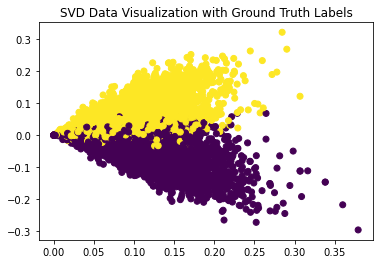

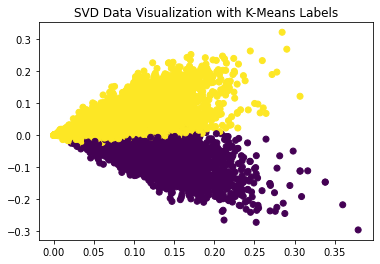

Homogeneity score for : 0.568952
Completeness score for : 0.583977
V-measure score for : 0.576367
Adjusted Rand Index score for : 0.629119
Adjusted mutual information score for : 0.576327


In [13]:
# N_Components 50
svd_t = TruncatedSVD(n_components=50, random_state=42)
words_count_int = svd_t.fit_transform(word_counts)
words_count_svd = svd_2.fit_transform(words_count_int)
kmeans.fit(words_count_int)

plt.scatter(words_count_svd[:,0], words_count_svd[:,1], c = y_output)
plt.title("SVD Data Visualization with Ground Truth Labels")
plt.show()
plt.scatter(words_count_svd[:,0],words_count_svd[:,1],c = kmeans.labels_)
plt.title("SVD Data Visualization with K-Means Labels")
plt.show()

Clustering_Metrics(y_output, kmeans.labels_)

# QUESTION 10

Load documents with the same configuration as in Question 1, but for ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality properly using either NMF or SVD, and perform K-Means clustering with k=20 . Visualize the contingency matrix and report the five clustering metrics.

In [15]:
dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
count_vec = CountVectorizer(stop_words="english", min_df=3)
tfidf_tranformer = TfidfTransformer(use_idf=True)

data = pd.DataFrame(dataset.data)
print(data.head())

word_count_vec = count_vec.fit_transform(dataset.data)
word_count_vec_tf = tfidf_tranformer.fit_transform(word_count_vec)
word_count_array = word_count_vec_tf.toarray()
word_counts = pd.DataFrame(data=word_count_array, columns = count_vec.get_feature_names())

print(word_counts.shape)

                                                   0
0  FOR SALE\n\n                 1945 King Feature...
1  Earlier today I read an ad for REAL-3D animati...
2  Can someone cite Biblical references to homose...
3  My friends and I have a buch of books for sale...
4  maa@plato.ds.boeing.com (Mark A Allyn) writes:...
(18846, 45365)


In [28]:
components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
bestSVD = 0
kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
bestAris = 0

for r in components:
    print(r)
    svd_t = TruncatedSVD(n_components=r, random_state=42)
    words_count_svd = svd_t.fit_transform(word_counts)
    kmeans20.fit(words_count_svd)

    hs = homogeneity_score(dataset.target, kmeans20.labels_)
    cs = completeness_score(dataset.target, kmeans20.labels_)
    vms = v_measure_score(dataset.target, kmeans20.labels_)
    aris = adjusted_rand_score(dataset.target, kmeans20.labels_)
    amis = adjusted_mutual_info_score(dataset.target, kmeans20.labels_)

    avg_score = (hs + cs + vms + aris + amis) / 5
    
    print('Average Score: ' + str(avg_score))
    print('Adjusted Rand Index Score: ' + str(aris))

    if(avg_score > bestSVD):
        bestSVD = avg_score
        bestrSVD = r
    
    if(aris > bestAris):
        bestAris = aris
        bestrSVDAris = r
        
print('Best r in terms of average score: ' + str(bestrSVD))
print('Best SVD Score: ' + str(bestSVD))

print('Best r in terms of Adjusted Rand Score: ' + str(bestrSVDAris))
print('Best SVD Score: ' + str(bestAris))

1
Average Score: 0.020699099772094783
Adjusted Rand Index Score: 0.0052377752057146945
2
Average Score: 0.1866356606182336
Adjusted Rand Index Score: 0.06522862222326206
3
Average Score: 0.2210624664991327
Adjusted Rand Index Score: 0.08430423856596442
5
Average Score: 0.2933199644577863
Adjusted Rand Index Score: 0.1264834813291519
10
Average Score: 0.2934249864519825
Adjusted Rand Index Score: 0.12150471868687898
20
Average Score: 0.3088622981853003
Adjusted Rand Index Score: 0.12061901723196018
50
Average Score: 0.3008653247451001
Adjusted Rand Index Score: 0.09873548453280839
100
Average Score: 0.3010667727493633
Adjusted Rand Index Score: 0.10233658634623306
300
Average Score: 0.278357458025868
Adjusted Rand Index Score: 0.0926830632169624
Best r in terms of average score: 20
Best SVD Score: 0.3088622981853003
Best r in terms of Adjusted Rand Score: 5
Best SVD Score: 0.1264834813291519


In [5]:
# R = 20 - Average Score
svd_t = TruncatedSVD(n_components=bestrSVD, random_state=42)
words_count_svd = svd_t.fit_transform(word_counts)
kmeans20.fit(words_count_svd)

KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0)

In [7]:
def Clustering_Metrics(y_test, y_pred, name=""):
    print("Homogeneity score for %s: %f" %(name, homogeneity_score(y_test, y_pred)))
    print("Completeness score for %s: %f" % (name, completeness_score(y_test, y_pred)))
    print("V-measure score for %s: %f" % (name, v_measure_score(y_test, y_pred)))
    print("Adjusted Rand Index score for %s: %f" % (name, adjusted_rand_score(y_test, y_pred)))
    print("Adjusted mutual information score for %s: %f" % (name, adjusted_mutual_info_score(y_test, y_pred)))

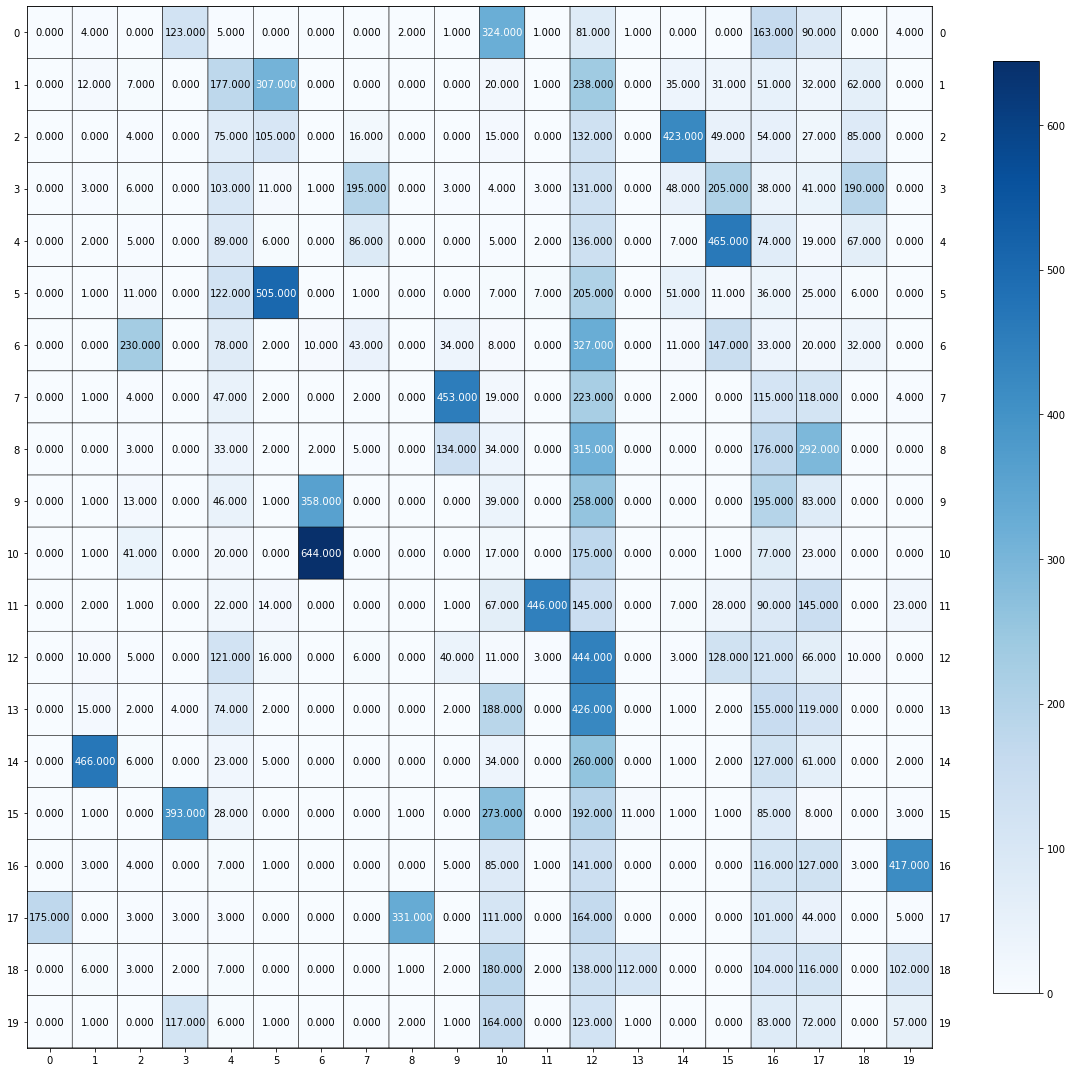

Homogeneity score for : 0.336158
Completeness score for : 0.378021
V-measure score for : 0.355862
Adjusted Rand Index score for : 0.120619
Adjusted mutual information score for : 0.353652


In [7]:
plot_mat(contingency_matrix(dataset.target, kmeans20.labels_), size = (15,15))
Clustering_Metrics(dataset.target, kmeans20.labels_)

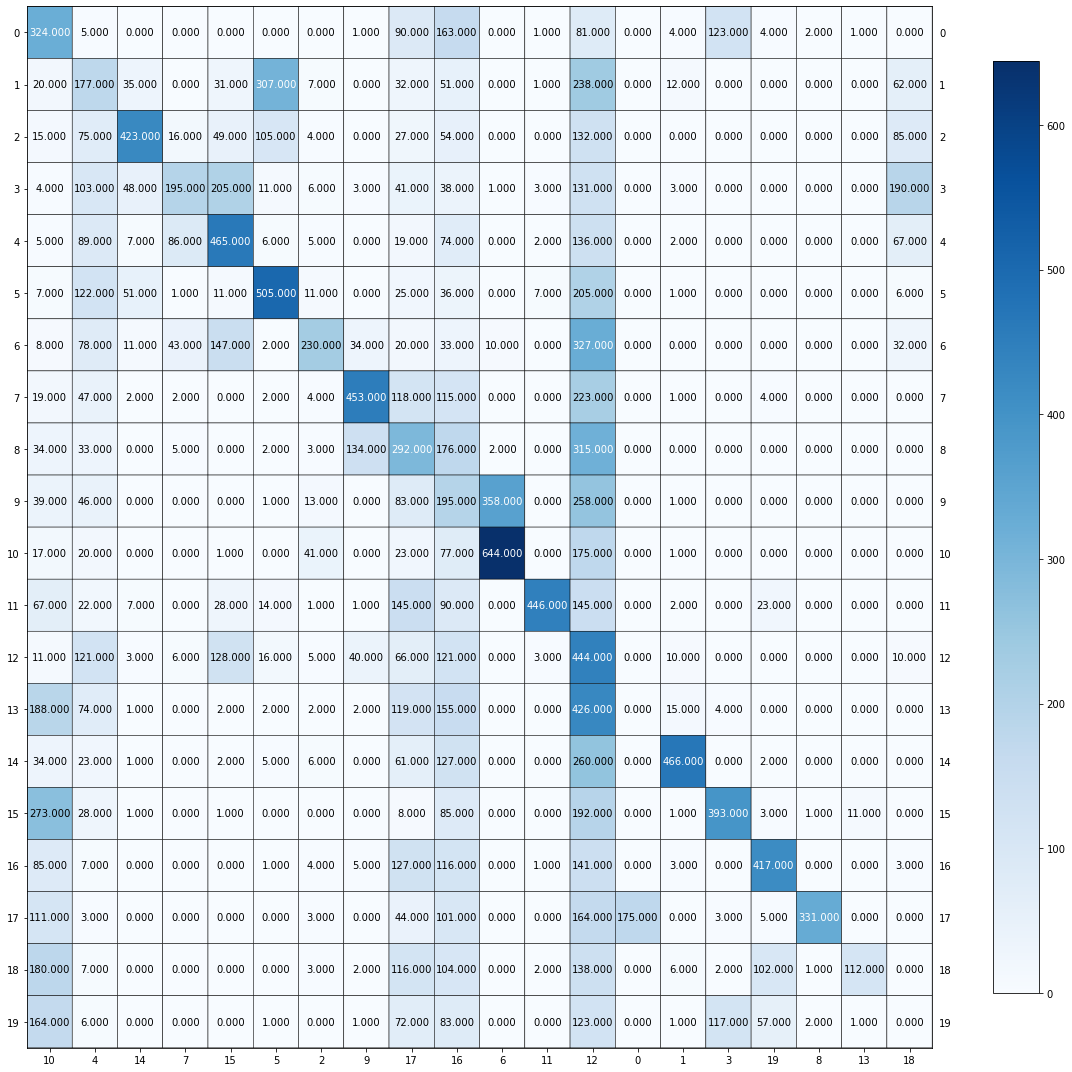

In [8]:
cm = confusion_matrix(dataset.target, kmeans20.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

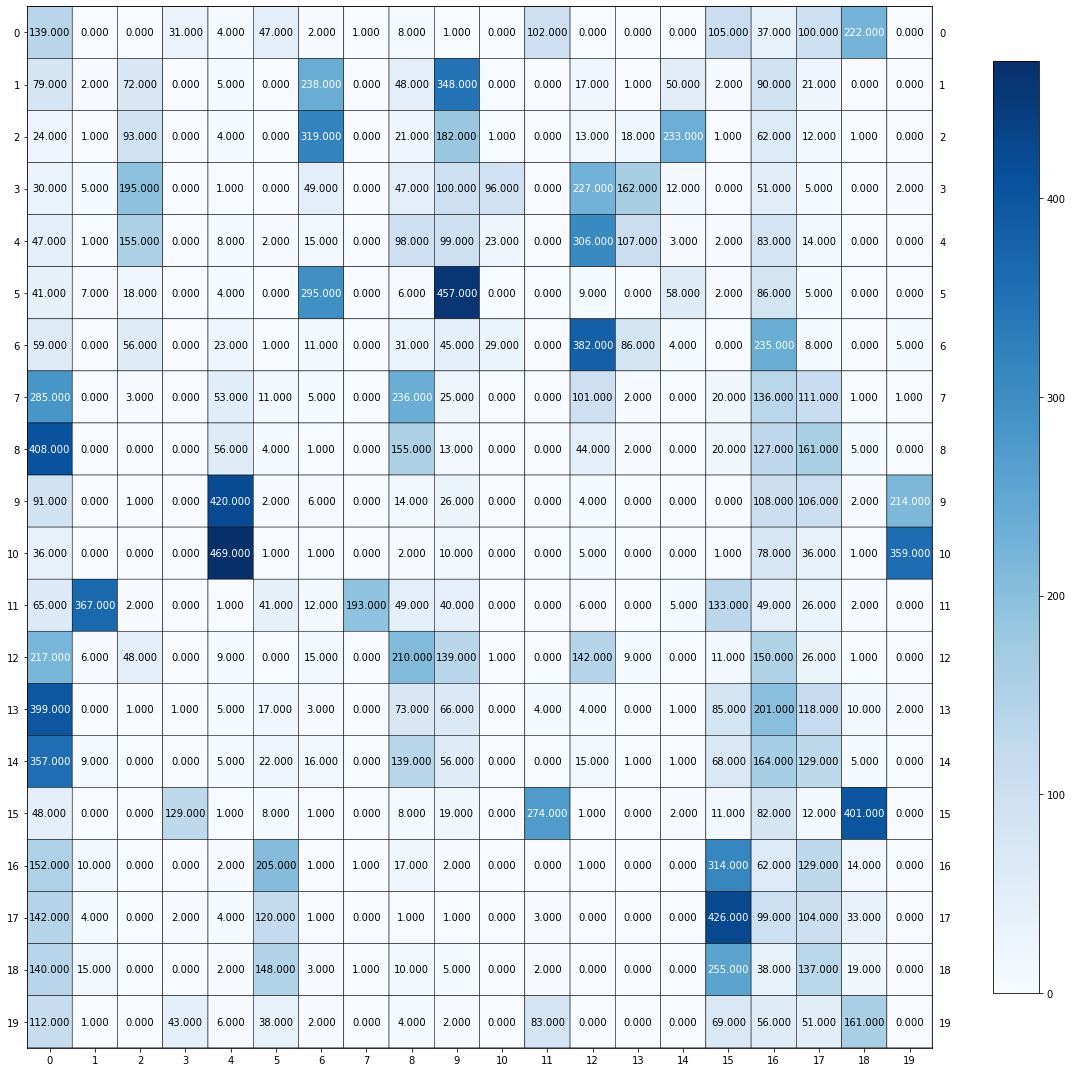

Homogeneity score for : 0.322084
Completeness score for : 0.349661
V-measure score for : 0.335306
Adjusted Rand Index score for : 0.126483
Adjusted mutual information score for : 0.333065


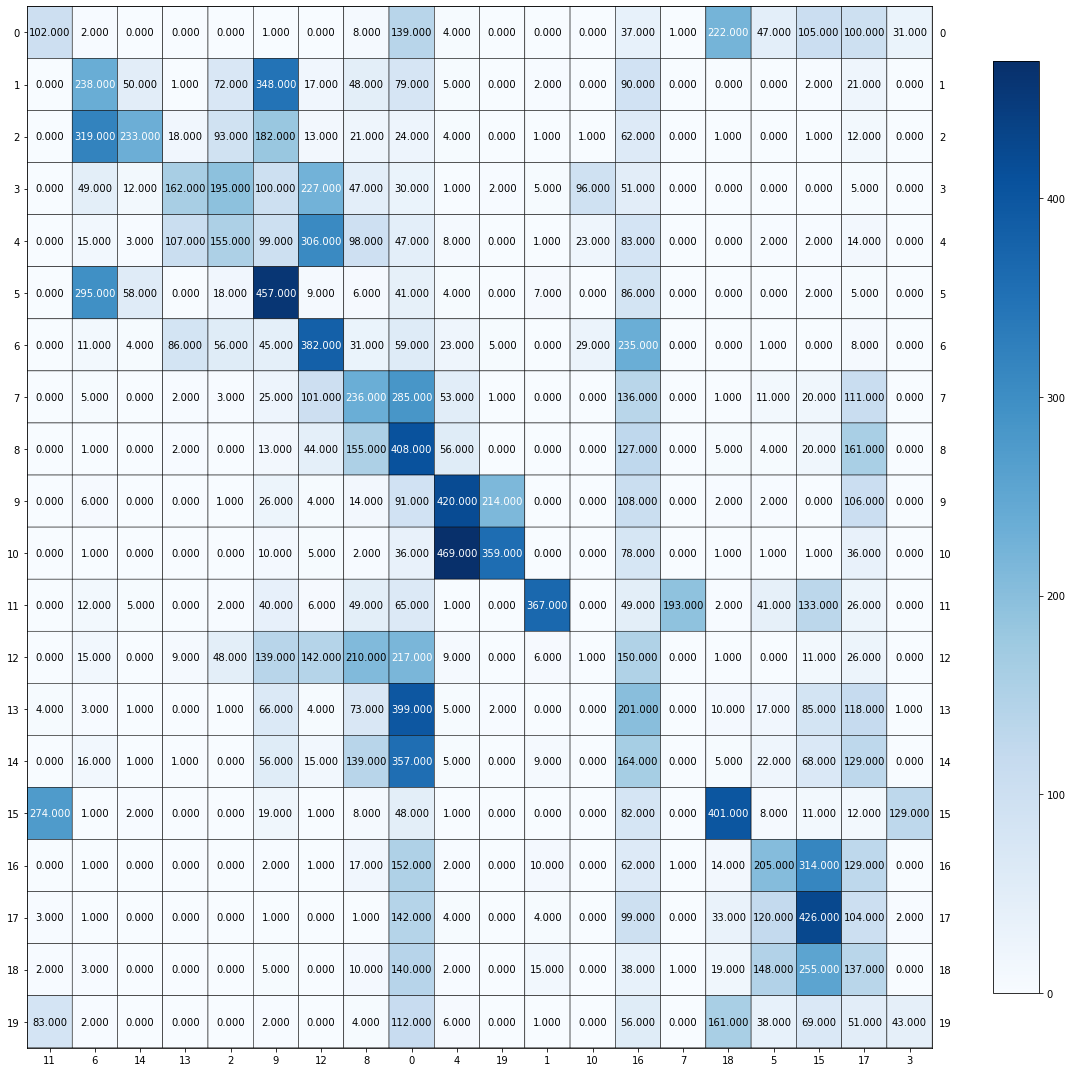

In [29]:
# R = 5 - Rand Score
svd_t = TruncatedSVD(n_components=5, random_state=42)
words_count_svd = svd_t.fit_transform(word_counts)
kmeans20.fit(words_count_svd)

plot_mat(contingency_matrix(dataset.target, kmeans20.labels_), size = (15,15))
Clustering_Metrics(dataset.target, kmeans20.labels_)

cm = confusion_matrix(dataset.target, kmeans20.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

In [16]:
components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
bestNMF = 0
kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
bestAris = 0

for r in components:
    print(r)
    nmf = NMF(n_components=r, init='random', random_state=42, max_iter=1000)
    words_count_nmf = nmf.fit_transform(word_counts)
    kmeans20.fit(words_count_nmf)

    hs = homogeneity_score(dataset.target, kmeans20.labels_)
    cs = completeness_score(dataset.target, kmeans20.labels_)
    vms = v_measure_score(dataset.target, kmeans20.labels_)
    aris = adjusted_rand_score(dataset.target, kmeans20.labels_)
    amis = adjusted_mutual_info_score(dataset.target, kmeans20.labels_)

    avg_score = (hs + cs + vms + aris + amis) / 5

    if(avg_score > bestNMF):
        bestNMF = avg_score
        bestrNMF = r
    
    if(aris > bestAris):
        bestAris = aris
        bestrSVDAris = r

print('Best r in terms of Adjusted Rand Score: ' + str(bestrSVDAris))
print('Best NMF Score: ' + str(bestAris))
        
print('Best r: ' + str(bestrNMF))
print('Best NMF Score: ' + str(bestNMF))

1
2
3
5
10


/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


20
50
100
300
Best r in terms of Adjusted Rand Score: 10
Best NMF Score: 0.12288393405698932
Best r: 10
Best NMF Score: 0.3080249921821888


/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


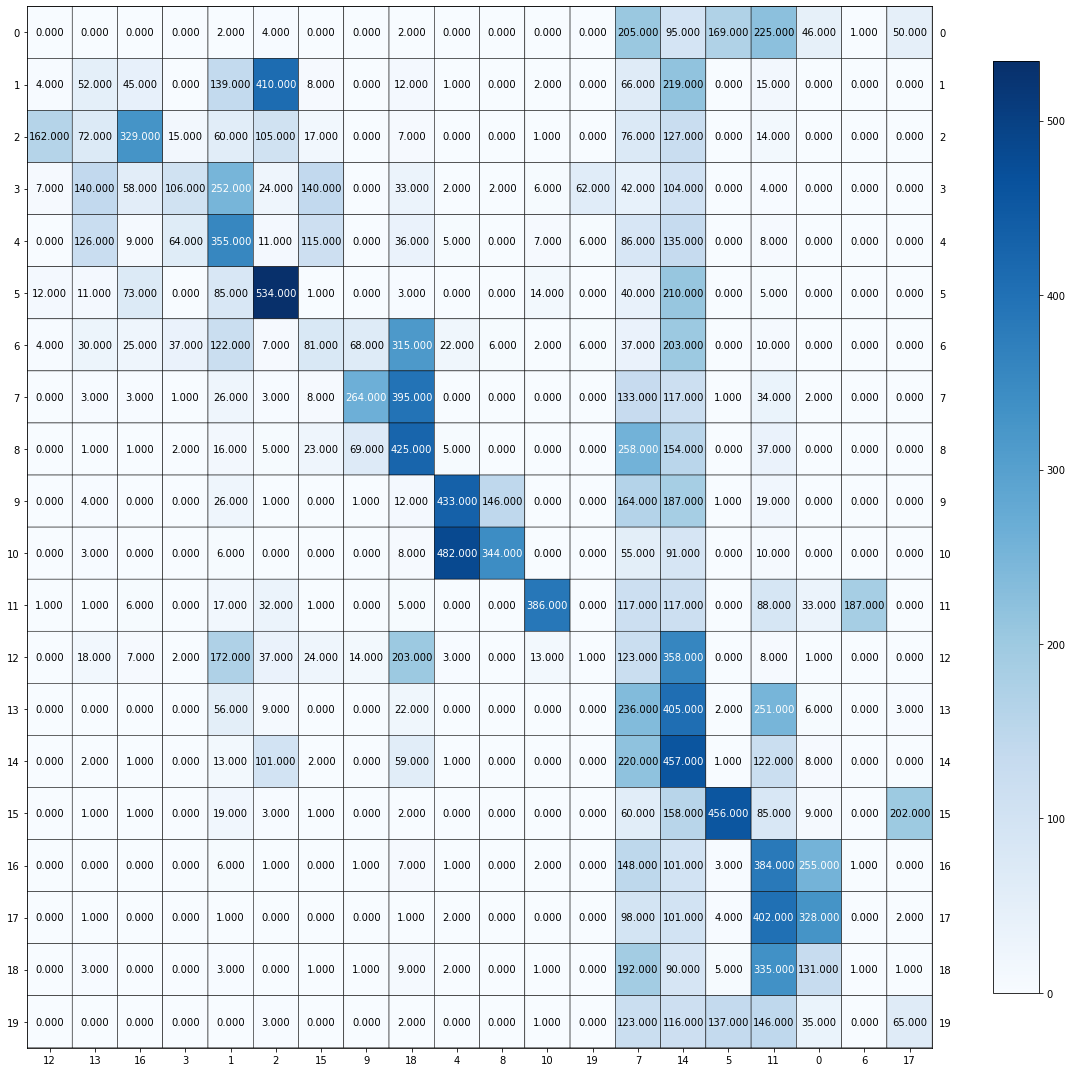

Homogeneity score for : 0.332317
Completeness score for : 0.378952
V-measure score for : 0.354105
Adjusted Rand Index score for : 0.122884
Adjusted mutual information score for : 0.351868


In [10]:
nmf = NMF(n_components=bestrNMF, init='random', random_state=42, max_iter=1000)
words_count_nmf = nmf.fit_transform(word_counts)
kmeans20.fit(words_count_nmf)

cm = confusion_matrix(dataset.target, kmeans20.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, kmeans20.labels_)

# QUESTION 11: 
    
Use UMAP to reduce the dimensionality of the 20 category TF-IDF matrix, and apply K-Means clustering with n_components=20 .
Find a good n components choice for UMAP, and compare the performance of two metrics by setting metric="euclidean" and metric="cosine" respectively.
6
Report the permuted contingency matrix and the five clustering evaluation metrics for "euclidean" and "cosine".

In [4]:
components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
bestUMAPE = 0
bestUMAPC = 0
kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
bestArise = 0
bestArisc = 0

for r in components:
    print(r)
    umap_20 = umap.UMAP(n_components=r, metric='euclidean')
    words_count_umap = umap_20.fit_transform(word_counts)
    kmeans20.fit(words_count_umap)

    hs = homogeneity_score(dataset.target, kmeans20.labels_)
    cs = completeness_score(dataset.target, kmeans20.labels_)
    vms = v_measure_score(dataset.target, kmeans20.labels_)
    aris = adjusted_rand_score(dataset.target, kmeans20.labels_)
    amis = adjusted_mutual_info_score(dataset.target, kmeans20.labels_)

    avg_score = (hs + cs + vms + aris + amis) / 5
    
    print('Euclidean - Average Score: ' + str(avg_score))
    print('Euclidean - Adjusted Rand Index Score: ' + str(aris))

    if(avg_score > bestUMAPE):
        bestUMAPE = avg_score
        bestrUMAPE = r
        
    if(aris > bestArise):
        bestArise = aris
        bestrSVDArise = r
        
    umap_20 = umap.UMAP(n_components=r, metric='cosine')
    words_count_umap = umap_20.fit_transform(word_counts)
    kmeans20.fit(words_count_umap)

    hs = homogeneity_score(dataset.target, kmeans20.labels_)
    cs = completeness_score(dataset.target, kmeans20.labels_)
    vms = v_measure_score(dataset.target, kmeans20.labels_)
    aris = adjusted_rand_score(dataset.target, kmeans20.labels_)
    amis = adjusted_mutual_info_score(dataset.target, kmeans20.labels_)

    avg_score = (hs + cs + vms + aris + amis) / 5
    
    print('Cosine - Average Score: ' + str(avg_score))
    print('Cosine - Adjusted Rand Index Score: ' + str(aris))

    if(avg_score > bestUMAPC):
        bestUMAPC = avg_score
        bestrUMAPC = r
        
    if(aris > bestArisc):
        bestArisc = aris
        bestrSVDArisc = r

print('Best r in terms of Adjusted Rand Score Euclidean: ' + str(bestrSVDArise))
print('Best UMAP Euclidean Score: ' + str(bestArise))
        
print('Best r in terms of Adjusted Rand Score Cosine: ' + str(bestrSVDArisc))
print('Best UMAP Cosine Score: ' + str(bestArisc))
        
print('Best r for Euclidean: ' + str(bestrUMAPE))
print('Best UMAP Euclidean Score: ' + str(bestUMAPE))

print('Best r for Cosine: ' + str(bestrUMAPC))
print('Best UMAP Cosine Score: ' + str(bestUMAPC))

1


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Euclidean - Average Score: 0.011659970714660623
Euclidean - Adjusted Rand Index Score: 0.0011295727155154144
Cosine - Average Score: 0.36682839488031094
Cosine - Adjusted Rand Index Score: 0.24835561340182444
2


/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


Euclidean - Average Score: 0.009233754868241337
Euclidean - Adjusted Rand Index Score: 0.0017955497426913746
Cosine - Average Score: 0.5349270395670415
Cosine - Adjusted Rand Index Score: 0.42473084210867085
3
Euclidean - Average Score: 0.009700451521090385
Euclidean - Adjusted Rand Index Score: 0.002519239806148265
Cosine - Average Score: 0.5462503764507097
Cosine - Adjusted Rand Index Score: 0.4557831159281759
5
Euclidean - Average Score: 0.011166397831138417
Euclidean - Adjusted Rand Index Score: 0.002427968998191207
Cosine - Average Score: 0.558580767044962
Cosine - Adjusted Rand Index Score: 0.4569154074672965
10
Euclidean - Average Score: 0.012489899366956242
Euclidean - Adjusted Rand Index Score: 0.0032872120779449095
Cosine - Average Score: 0.5535767526541606
Cosine - Adjusted Rand Index Score: 0.45350646353504553
20
Euclidean - Average Score: 0.012594589510638046
Euclidean - Adjusted Rand Index Score: 0.003538731411959756
Cosine - Average Score: 0.5587034208966832
Cosine - Adj

Results:


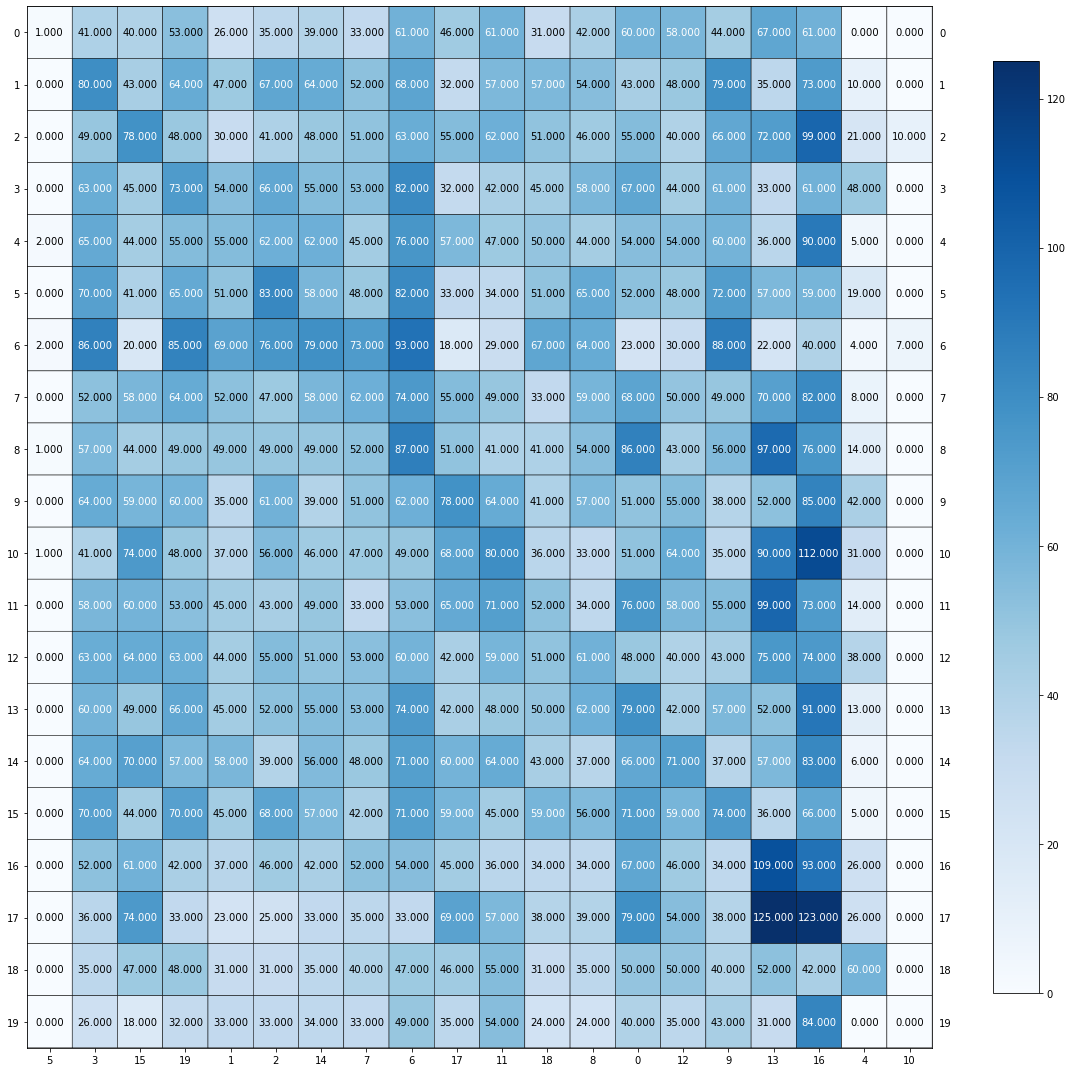

Homogeneity score for Euclidean UMAP: 0.013954
Completeness score for Euclidean UMAP: 0.014534
V-measure score for Euclidean UMAP: 0.014238
Adjusted Rand Index score for Euclidean UMAP: 0.003035
Adjusted mutual information score for Euclidean UMAP: 0.010984


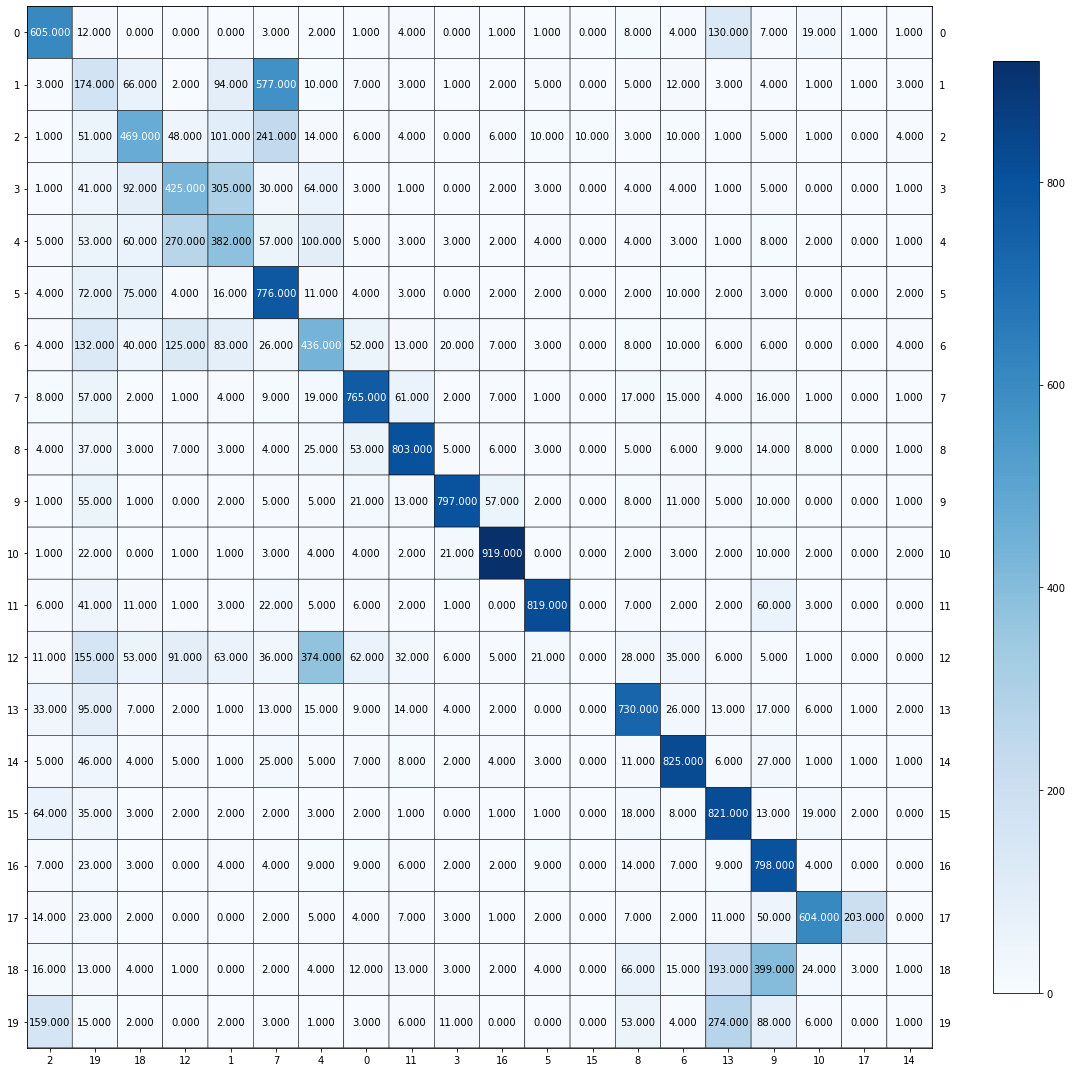

Homogeneity score for Cosine UMAP: 0.556166
Completeness score for Cosine UMAP: 0.584718
V-measure score for Cosine UMAP: 0.570085
Adjusted Rand Index score for Cosine UMAP: 0.438110
Adjusted mutual information score for Cosine UMAP: 0.568648


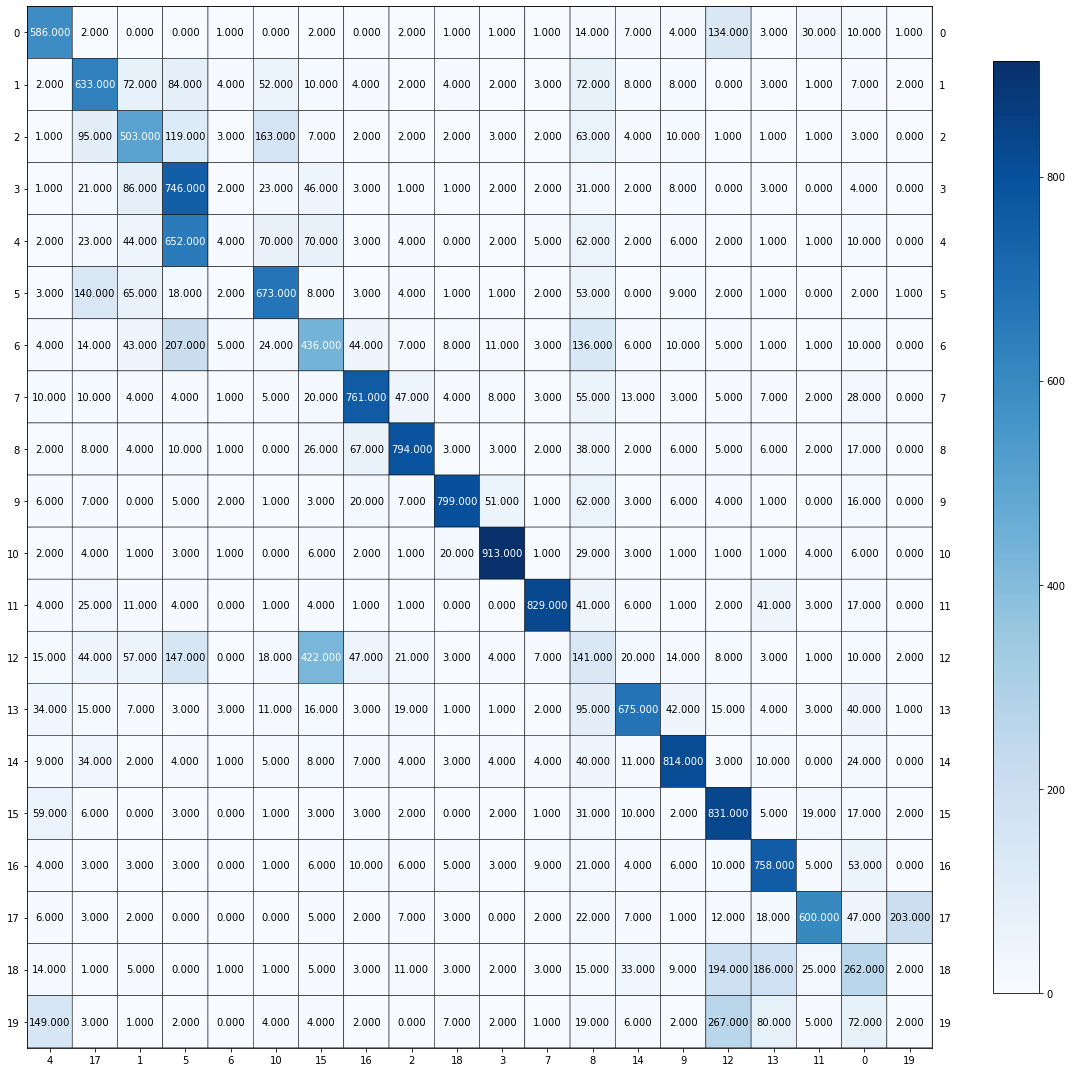

Homogeneity score for Cosine UMAP: 0.576348
Completeness score for Cosine UMAP: 0.596052
V-measure score for Cosine UMAP: 0.586034
Adjusted Rand Index score for Cosine UMAP: 0.461406
Adjusted mutual information score for Cosine UMAP: 0.584664


In [8]:
print('Results:')
#n-components = 20
umap_20 = umap.UMAP(n_components=20, metric='euclidean')
words_count_umap = umap_20.fit_transform(word_counts)
kmeans20.fit(words_count_umap)

cm = confusion_matrix(dataset.target, kmeans20.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, kmeans20.labels_, "Euclidean UMAP")

#n-components = 5 - Adjusted Rand Score
umap_20 = umap.UMAP(n_components=5, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)
kmeans20.fit(words_count_umap)

cm = confusion_matrix(dataset.target, kmeans20.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, kmeans20.labels_, "Cosine UMAP")

#n-components = 20 - Average Score
umap_20 = umap.UMAP(n_components=20, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)
kmeans20.fit(words_count_umap)

cm = confusion_matrix(dataset.target, kmeans20.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, kmeans20.labels_, "Cosine UMAP")

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


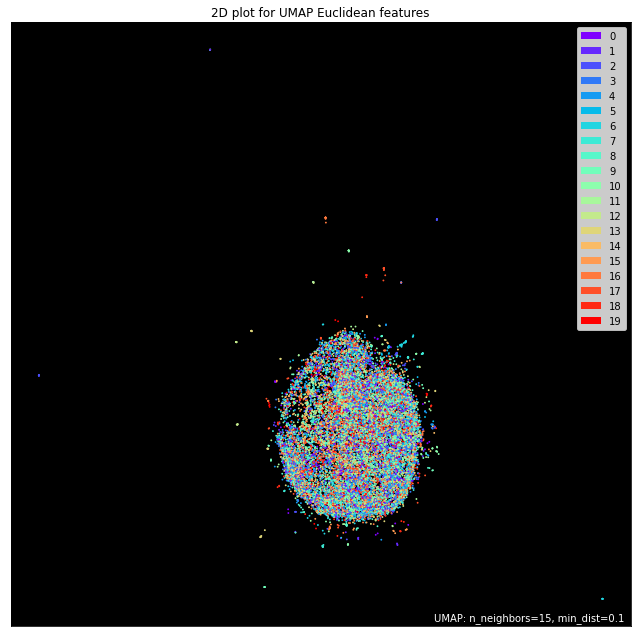

In [9]:
dim_embedding = umap.UMAP(n_components=2, metric='euclidean').fit(word_counts)

f = umap.plot.points(dim_embedding, labels=np.array(dataset.target), theme='fire')
plt.title('2D plot for UMAP Euclidean features')
plt.show()

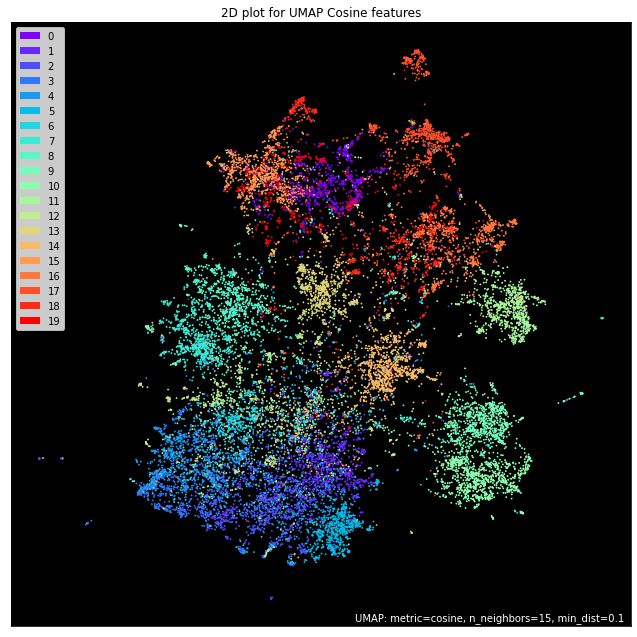

In [10]:
dim_embedding = umap.UMAP(n_components=2, metric='cosine').fit(word_counts)

f = umap.plot.points(dim_embedding, labels=np.array(dataset.target), theme='fire')
plt.title('2D plot for UMAP Cosine features')
plt.show()

# Question 13

In [3]:
# Sparse Representation

kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=1, random_state=0)
kmeans20.fit(word_counts)
Clustering_Metrics(dataset.target, kmeans20.labels_, "Sparse Representation")

Homogeneity score for Sparse Representation: 0.342959
Completeness score for Sparse Representation: 0.392091
V-measure score for Sparse Representation: 0.365883
Adjusted Rand Index score for Sparse Representation: 0.121723
Adjusted mutual information score for Sparse Representation: 0.363694


# QUESTION 14: 

Use UMAP to reduce the dimensionality properly, and perform Agglomerative clustering with n_clusters=20 . Compare the performance of “ward” and “single” linkage criteria.
Report the five clustering evaluation metrics for each case.

In [17]:
components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
for r in components:
    print('r = ' + str(r))
    umap_20 = umap.UMAP(n_components=r, metric='cosine')
    words_count_umap = umap_20.fit_transform(word_counts)
    agg_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(words_count_umap)
    
    hs = homogeneity_score(dataset.target, agg_ward.labels_)
    cs = completeness_score(dataset.target, agg_ward.labels_)
    vms = v_measure_score(dataset.target, agg_ward.labels_)
    aris = adjusted_rand_score(dataset.target, agg_ward.labels_)
    amis = adjusted_mutual_info_score(dataset.target, agg_ward.labels_)

    avg_score = (hs + cs + vms + aris + amis) / 5
    
    print('Ward - Average Score: ' + str(avg_score))
    print('Ward - Adjusted Rand Index Score: ' + str(aris))
    
    umap_20 = umap.UMAP(n_components=r, metric='cosine')
    words_count_umap = umap_20.fit_transform(word_counts)
    agg_ward = AgglomerativeClustering(n_clusters=20, linkage='single').fit(words_count_umap)
    
    hs = homogeneity_score(dataset.target, agg_ward.labels_)
    cs = completeness_score(dataset.target, agg_ward.labels_)
    vms = v_measure_score(dataset.target, agg_ward.labels_)
    aris = adjusted_rand_score(dataset.target, agg_ward.labels_)
    amis = adjusted_mutual_info_score(dataset.target, agg_ward.labels_)

    avg_score = (hs + cs + vms + aris + amis) / 5
    
    print('Single - Average Score: ' + str(avg_score))
    print('Single - Adjusted Rand Index Score: ' + str(aris))

r = 1


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Ward - Average Score: 0.37280719554437003
Ward - Adjusted Rand Index Score: 0.25499290629074656
Single - Average Score: 0.09894774627791939
Single - Adjusted Rand Index Score: 0.0011583407478178026
r = 2
Ward - Average Score: 0.5213396697993213
Ward - Adjusted Rand Index Score: 0.4054495051431426
Single - Average Score: 0.0918021807735636
Single - Adjusted Rand Index Score: 0.0004794021782465533
r = 3
Ward - Average Score: 0.5252274397588991
Ward - Adjusted Rand Index Score: 0.40808944756741156
Single - Average Score: 0.09215160953150422
Single - Adjusted Rand Index Score: 0.0006487202324916832
r = 5
Ward - Average Score: 0.5373638423827882
Ward - Adjusted Rand Index Score: 0.41922979197682786
Single - Average Score: 0.09474693013632571
Single - Adjusted Rand Index Score: 0.0004640604374673964
r = 10
Ward - Average Score: 0.5421441761875938
Ward - Adjusted Rand Index Score: 0.4135373003982577
Single - Average Score: 0.09163247979160813
Single - Adjusted Rand Index Score: 0.000477172568

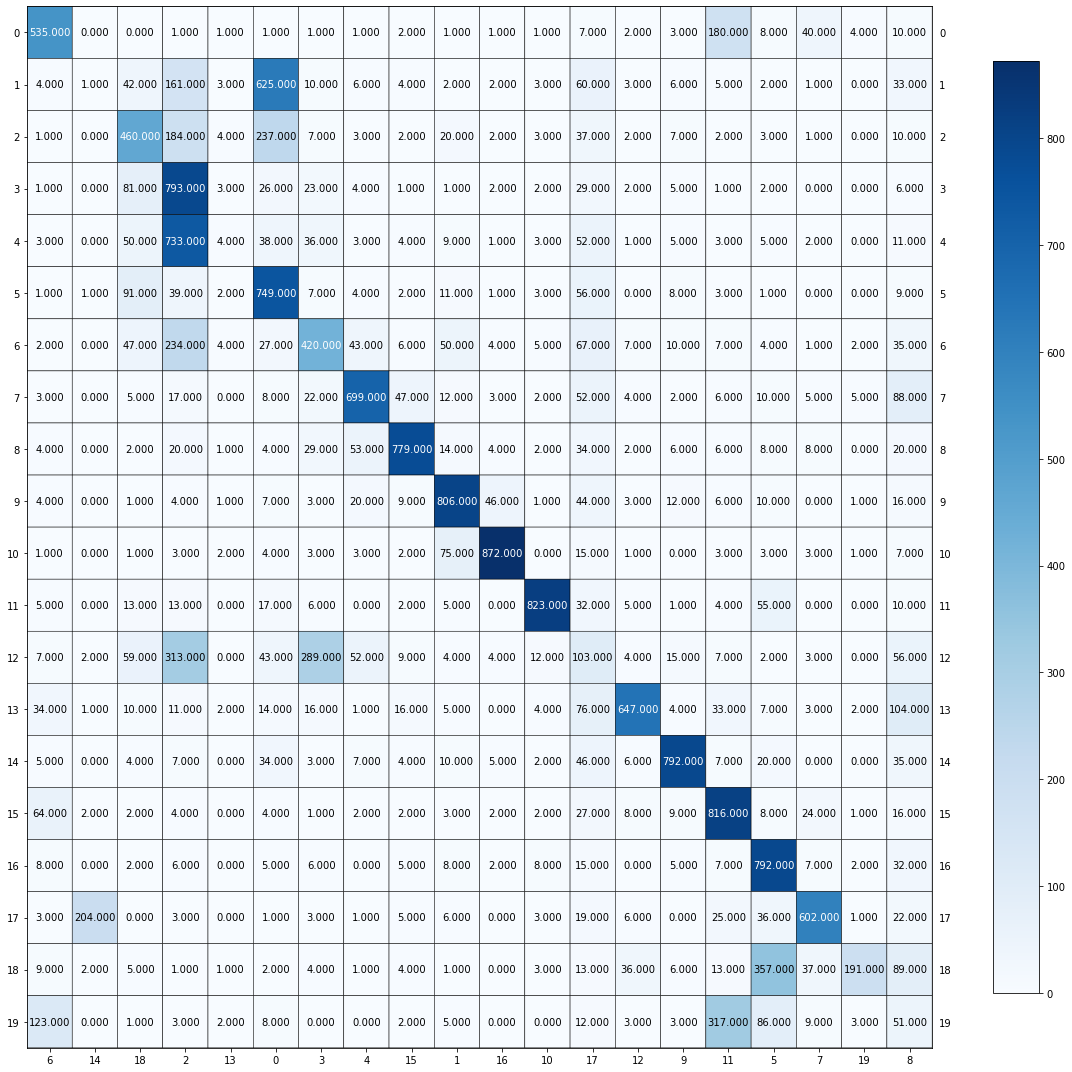

Homogeneity score for Agglomerative Clustering - Ward: 0.557938
Completeness score for Agglomerative Clustering - Ward: 0.591014
V-measure score for Agglomerative Clustering - Ward: 0.574000
Adjusted Rand Index score for Agglomerative Clustering - Ward: 0.424335
Adjusted mutual information score for Agglomerative Clustering - Ward: 0.572572


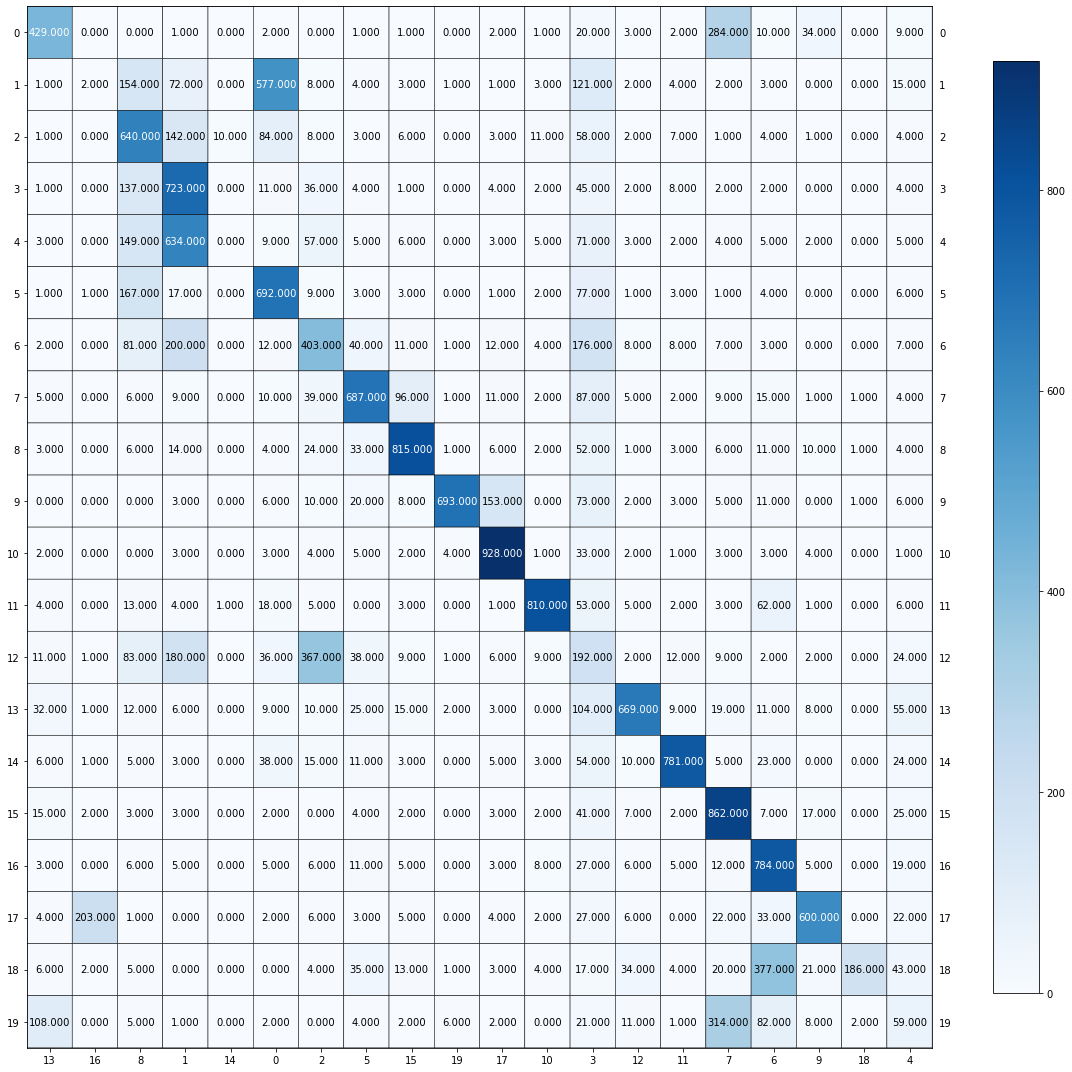

Homogeneity score for Agglomerative Clustering - Ward: 0.561838
Completeness score for Agglomerative Clustering - Ward: 0.595401
V-measure score for Agglomerative Clustering - Ward: 0.578133
Adjusted Rand Index score for Agglomerative Clustering - Ward: 0.425093
Adjusted mutual information score for Agglomerative Clustering - Ward: 0.576726


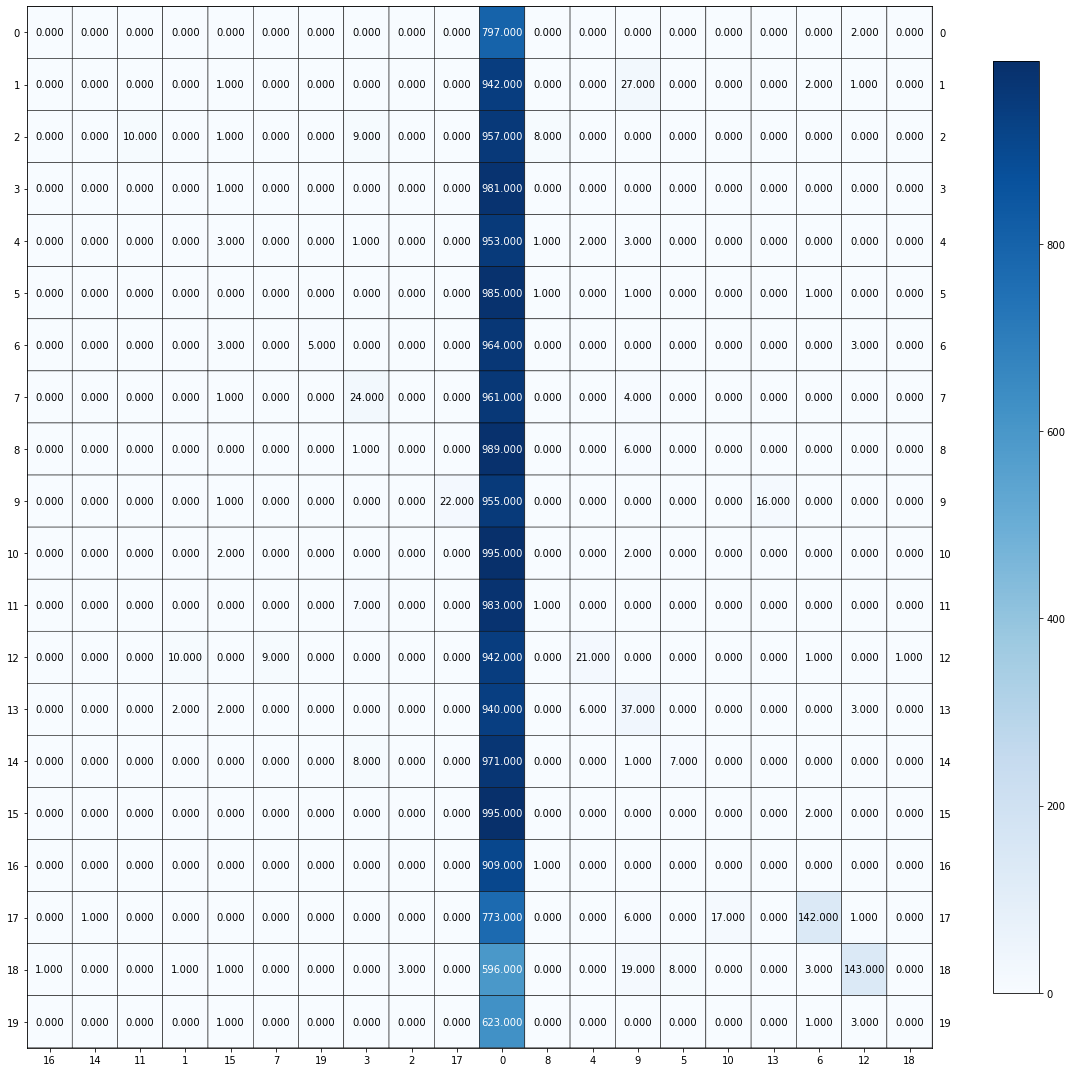

Homogeneity score for Agglomerative Clustering - Single: 0.026486
Completeness score for Agglomerative Clustering - Single: 0.357980
V-measure score for Agglomerative Clustering - Single: 0.049323
Adjusted Rand Index score for Agglomerative Clustering - Single: 0.000900
Adjusted mutual information score for Agglomerative Clustering - Single: 0.044019


In [16]:
umap_20 = umap.UMAP(n_components=50, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)
agg_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(words_count_umap)

cm = confusion_matrix(dataset.target, agg_ward.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, agg_ward.labels_, "Agglomerative Clustering - Ward")

umap_20 = umap.UMAP(n_components=300, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)
agg_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(words_count_umap)

cm = confusion_matrix(dataset.target, agg_ward.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, agg_ward.labels_, "Agglomerative Clustering - Ward")

umap_20 = umap.UMAP(n_components=1, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)
agg_single = AgglomerativeClustering(n_clusters=20, linkage='single').fit(words_count_umap)

cm = confusion_matrix(dataset.target, agg_single.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, agg_single.labels_, "Agglomerative Clustering - Single")

# QUESTION 15
    
Apply DBSCAN and HDBSCAN on UMAP-transformed 20-category data.
Use min_cluster_size=100.
Experiment on the hyperparameters and report your findings in terms of the five
clustering evaluation metrics.

In [12]:
def get_max_index(mat):
    return np.unravel_index(np.argmax(mat, axis=None), mat.shape)

eps = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0, 25.0, 50.0]
min_samples = [5,10,30,60,75,100,200,500,1000]
bestDBSCAN = 0
hs = np.zeros((len(eps), len(min_samples)))
cs = np.zeros((len(eps), len(min_samples)))
vms = np.zeros((len(eps), len(min_samples)))
aris = np.zeros((len(eps), len(min_samples)))
amis = np.zeros((len(eps), len(min_samples)))
avg_score = np.zeros((len(eps), len(min_samples)))

for i in range(len(eps)):
    for j in range(len(min_samples)):
        print(eps[i], min_samples[j])
        dbs = DBSCAN(eps = eps[i], min_samples = min_samples[j]).fit_predict(words_count_umap)
        
        hs[i, j] = homogeneity_score(dataset.target, dbs)
        cs[i, j] = completeness_score(dataset.target, dbs)
        vms[i, j] = v_measure_score(dataset.target, dbs)
        aris[i, j] = adjusted_rand_score(dataset.target, dbs)
        amis[i, j] = adjusted_mutual_info_score(dataset.target, dbs)

        avg_score[i, j] = (hs[i, j] + cs[i, j] + vms[i, j] + aris[i, j] + amis[i, j]) / 5

        if(avg_score[i, j] > bestDBSCAN):
            bestDBSCAN = avg_score[i, j]
            bestEpsDBSCAN = eps[i]
            bestMinSamplesDBSCAN = min_samples[j]
            
print('Best eps for DBSCAN: ' + str(bestEpsDBSCAN))
print('Best Min Samples for DBSCAN: ' + str(bestMinSamplesDBSCAN))
print('Best Score for DBSCAN: ' + str(bestDBSCAN))

print('Best in terms of Adjusted Rand Index score')
(i, j) = get_max_index(aris)
print('Best Score:' + str(aris.max()))
print('Best eps for DBSCAN: ' + str(eps[i]))
print('Best Min Samples for DBSCAN: ' + str(min_samples[j]))

0.01 5
0.01 10
0.01 30
0.01 60
0.01 75
0.01 100
0.01 200
0.01 500
0.01 1000
0.1 5
0.1 10
0.1 30
0.1 60
0.1 75
0.1 100
0.1 200
0.1 500
0.1 1000
0.2 5
0.2 10
0.2 30
0.2 60
0.2 75
0.2 100
0.2 200
0.2 500
0.2 1000
0.3 5
0.3 10
0.3 30
0.3 60
0.3 75
0.3 100
0.3 200
0.3 500
0.3 1000
0.4 5
0.4 10
0.4 30
0.4 60
0.4 75
0.4 100
0.4 200
0.4 500
0.4 1000
0.5 5
0.5 10
0.5 30
0.5 60
0.5 75
0.5 100
0.5 200
0.5 500
0.5 1000
0.6 5
0.6 10
0.6 30
0.6 60
0.6 75
0.6 100
0.6 200
0.6 500
0.6 1000
0.7 5
0.7 10
0.7 30
0.7 60
0.7 75
0.7 100
0.7 200
0.7 500
0.7 1000
0.8 5
0.8 10
0.8 30
0.8 60
0.8 75
0.8 100
0.8 200
0.8 500
0.8 1000
0.9 5
0.9 10
0.9 30
0.9 60
0.9 75
0.9 100
0.9 200
0.9 500
0.9 1000
1.0 5
1.0 10
1.0 30
1.0 60
1.0 75
1.0 100
1.0 200
1.0 500
1.0 1000
5.0 5
5.0 10
5.0 30
5.0 60
5.0 75
5.0 100
5.0 200
5.0 500
5.0 1000
10.0 5
10.0 10
10.0 30
10.0 60
10.0 75
10.0 100
10.0 200
10.0 500
10.0 1000
25.0 5
25.0 10
25.0 30
25.0 60
25.0 75
25.0 100
25.0 200
25.0 500
25.0 1000
50.0 5
50.0 10
50.0 30
50.0 60
50.0

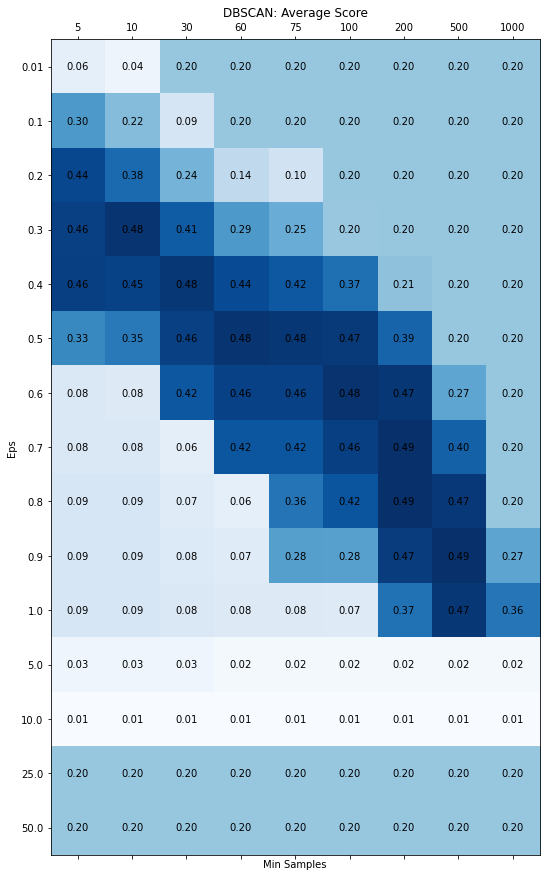

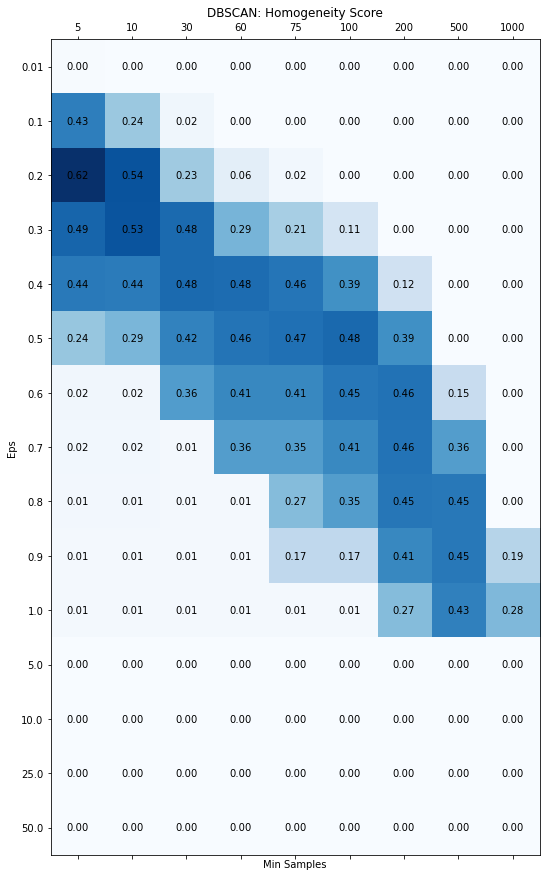

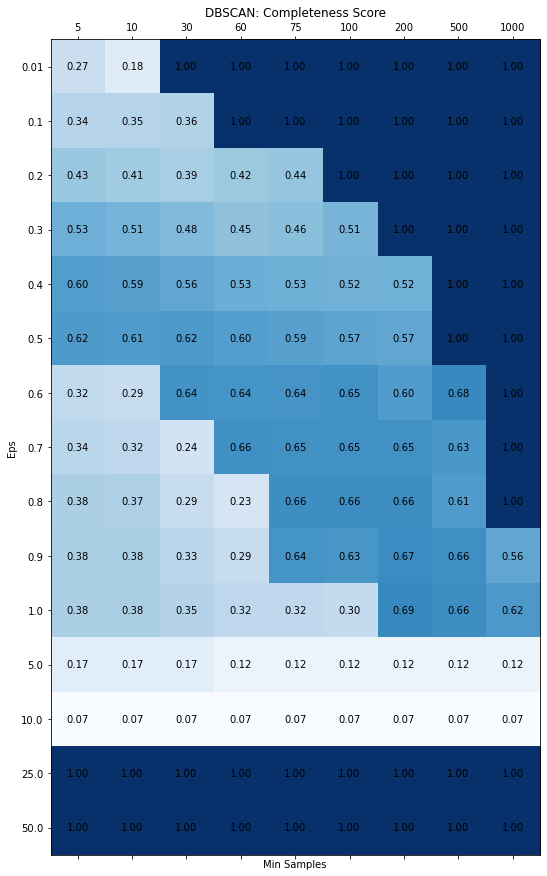

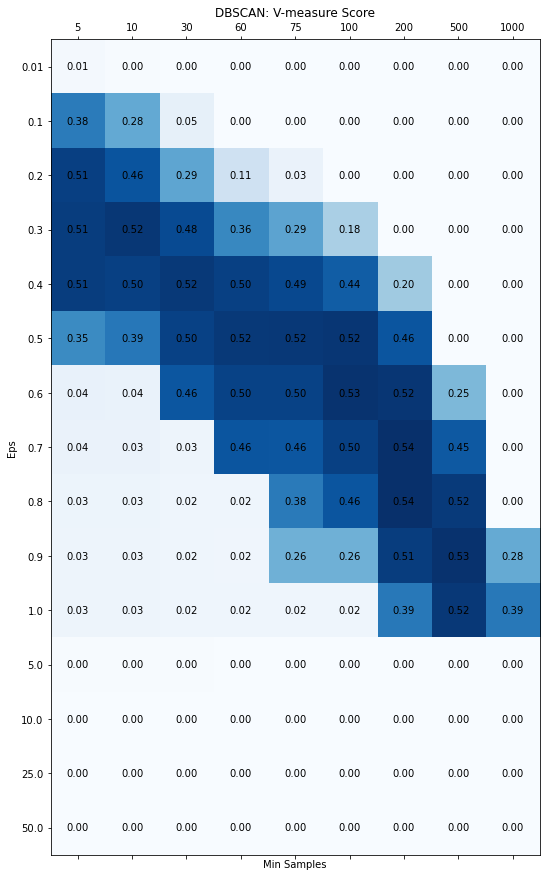

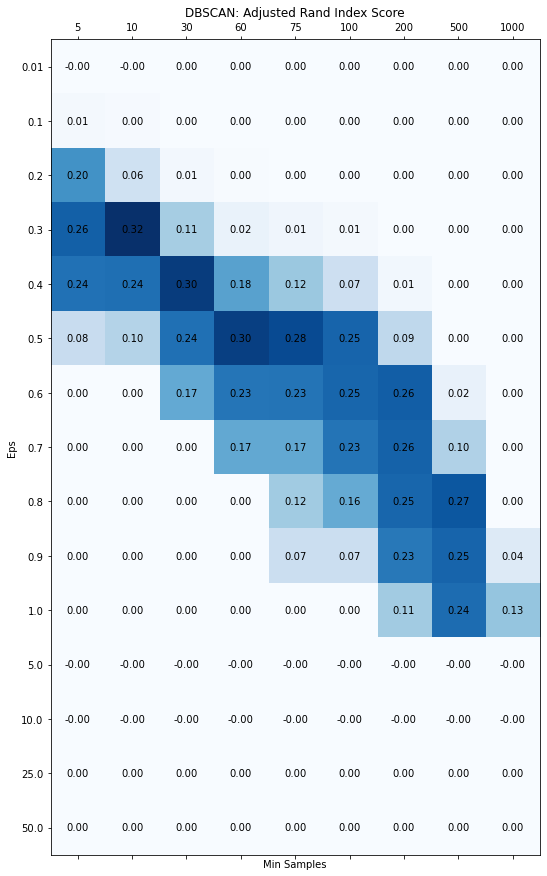

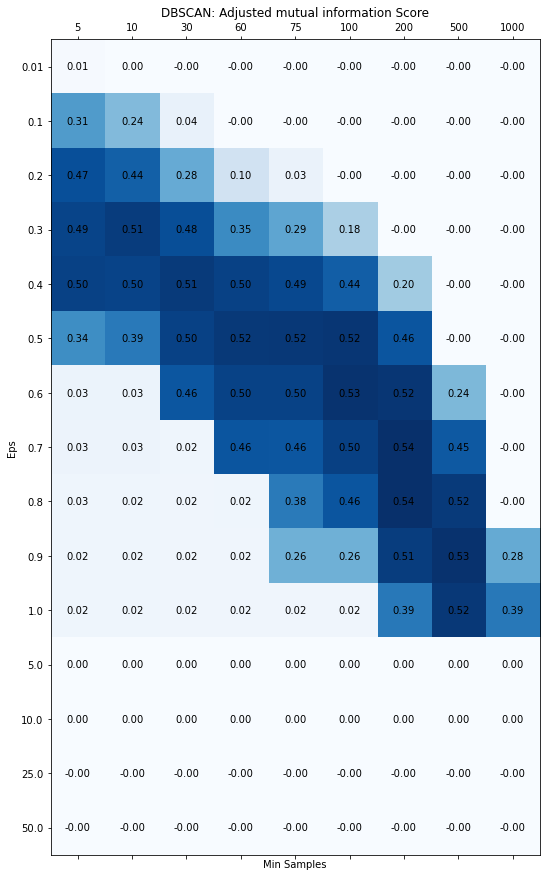

In [13]:
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(avg_score, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("DBSCAN: Average Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = avg_score[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')

# Homogeneity
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(hs, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("DBSCAN: Homogeneity Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = hs[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')

# CS
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(cs, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("DBSCAN: Completeness Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = cs[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')
        
# V-measure
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(vms, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("DBSCAN: V-measure Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = vms[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')

# Adjusted Rand Index        
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(aris, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("DBSCAN: Adjusted Rand Index Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = aris[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')
        
# Adjusted mutual information       
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(amis, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("DBSCAN: Adjusted mutual information Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = amis[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')

In [23]:
def get_max_index(mat):
    return np.unravel_index(np.argmax(mat, axis=None), mat.shape)

eps = [0.5, 5.0]
min_samples = [5,10,30,60,75,100,200,500,1000]
bestDBSCAN = 0
hs = np.zeros((len(eps), len(min_samples)))
cs = np.zeros((len(eps), len(min_samples)))
vms = np.zeros((len(eps), len(min_samples)))
aris = np.zeros((len(eps), len(min_samples)))
amis = np.zeros((len(eps), len(min_samples)))
avg_score = np.zeros((len(eps), len(min_samples)))

for i in range(len(eps)):
    for j in range(len(min_samples)):
        print(eps[i], min_samples[j])
        dbs = DBSCAN(eps = eps[i], min_samples = min_samples[j]).fit_predict(words_count_umap)
        
        hs[i, j] = homogeneity_score(dataset.target, dbs)
        cs[i, j] = completeness_score(dataset.target, dbs)
        vms[i, j] = v_measure_score(dataset.target, dbs)
        aris[i, j] = adjusted_rand_score(dataset.target, dbs)
        amis[i, j] = adjusted_mutual_info_score(dataset.target, dbs)

        avg_score[i, j] = (hs[i, j] + cs[i, j] + vms[i, j] + aris[i, j] + amis[i, j]) / 5

        if(avg_score[i, j] > bestDBSCAN):
            bestDBSCAN = avg_score[i, j]
            bestEpsDBSCAN = eps[i]
            bestMinSamplesDBSCAN = min_samples[j]
            
print('Best eps for DBSCAN: ' + str(bestEpsDBSCAN))
print('Best Min Samples for DBSCAN: ' + str(bestMinSamplesDBSCAN))
print('Best Score for DBSCAN: ' + str(bestDBSCAN))

print('Best in terms of Adjusted Rand Index score')
(i, j) = get_max_index(aris)
print('Best Score:' + str(aris.max()))
print('Best eps for DBSCAN: ' + str(eps[i]))
print('Best Min Samples for DBSCAN: ' + str(min_samples[j]))

0.5 5
0.5 10
0.5 30
0.5 60
0.5 75
0.5 100
0.5 200
0.5 500
0.5 1000
5.0 5
5.0 10
5.0 30
5.0 60
5.0 75
5.0 100
5.0 200
5.0 500
5.0 1000
Best eps for DBSCAN: 0.5
Best Min Samples for DBSCAN: 60
Best Score for DBSCAN: 0.4773516179716598
Best in terms of Adjusted Rand Index score
Best Score:0.2985271584692788
Best eps for DBSCAN: 0.5
Best Min Samples for DBSCAN: 60


In [21]:
def get_max_index(mat):
    return np.unravel_index(np.argmax(mat, axis=None), mat.shape)

eps = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0, 25.0, 50.0]
min_samples = [5,10,30,60,75,100,200,500,1000]
bestHDBSCAN = 0
hs = np.zeros((len(eps), len(min_samples)))
cs = np.zeros((len(eps), len(min_samples)))
vms = np.zeros((len(eps), len(min_samples)))
aris = np.zeros((len(eps), len(min_samples)))
amis = np.zeros((len(eps), len(min_samples)))
avg_score = np.zeros((len(eps), len(min_samples)))

for i in range(len(eps)):
    for j in range(len(min_samples)):
        print(eps[i], min_samples[j])
        
        hdbs = hdbscan.HDBSCAN(min_cluster_size=100, cluster_selection_epsilon=eps[i], min_samples=min_samples[j]).fit_predict(words_count_umap)
        
        hs[i, j] = homogeneity_score(dataset.target, hdbs)
        cs[i, j] = completeness_score(dataset.target, hdbs)
        vms[i, j] = v_measure_score(dataset.target, hdbs)
        aris[i, j] = adjusted_rand_score(dataset.target, hdbs)
        amis[i, j] = adjusted_mutual_info_score(dataset.target, hdbs)

        avg_score[i, j] = (hs[i, j] + cs[i, j] + vms[i, j] + aris[i, j] + amis[i, j]) / 5

        if(avg_score[i, j] > bestHDBSCAN):
            bestHDBSCAN = avg_score[i, j]
            bestEpsHDBSCAN = eps[i]
            bestMinSamplesHDBSCAN = min_samples[j]

print('Best eps for HDBSCAN: ' + str(bestEpsHDBSCAN))
print('Best Min Samples for HDBSCAN: ' + str(bestMinSamplesHDBSCAN))
print('Best Score for HDBSCAN: ' + str(bestHDBSCAN))

print('Best in terms of Adjusted Rand Index score')
(i, j) = get_max_index(aris)
print('Best Score:' + str(aris.max()))
print('Best eps for DBSCAN: ' + str(eps[i]))
print('Best Min Samples for DBSCAN: ' + str(min_samples[j]))

0.01 5
0.01 10
0.01 30
0.01 60
0.01 75
0.01 100
0.01 200
0.01 500
0.01 1000
0.1 5
0.1 10
0.1 30
0.1 60
0.1 75
0.1 100
0.1 200
0.1 500
0.1 1000
0.2 5
0.2 10
0.2 30
0.2 60
0.2 75
0.2 100
0.2 200
0.2 500
0.2 1000
0.3 5
0.3 10
0.3 30
0.3 60
0.3 75
0.3 100
0.3 200
0.3 500
0.3 1000
0.4 5
0.4 10
0.4 30
0.4 60
0.4 75
0.4 100
0.4 200
0.4 500
0.4 1000
0.5 5
0.5 10
0.5 30
0.5 60
0.5 75
0.5 100
0.5 200
0.5 500
0.5 1000
0.6 5
0.6 10
0.6 30
0.6 60
0.6 75
0.6 100
0.6 200
0.6 500
0.6 1000
0.7 5
0.7 10
0.7 30
0.7 60
0.7 75
0.7 100
0.7 200
0.7 500
0.7 1000
0.8 5
0.8 10
0.8 30
0.8 60
0.8 75
0.8 100
0.8 200
0.8 500
0.8 1000
0.9 5
0.9 10
0.9 30
0.9 60
0.9 75
0.9 100
0.9 200
0.9 500
0.9 1000
1.0 5
1.0 10
1.0 30
1.0 60
1.0 75
1.0 100
1.0 200
1.0 500
1.0 1000
5.0 5
5.0 10
5.0 30
5.0 60
5.0 75
5.0 100
5.0 200
5.0 500
5.0 1000
10.0 5
10.0 10
10.0 30
10.0 60
10.0 75
10.0 100
10.0 200
10.0 500
10.0 1000
25.0 5
25.0 10
25.0 30
25.0 60
25.0 75
25.0 100
25.0 200
25.0 500
25.0 1000
50.0 5
50.0 10
50.0 30
50.0 60
50.0

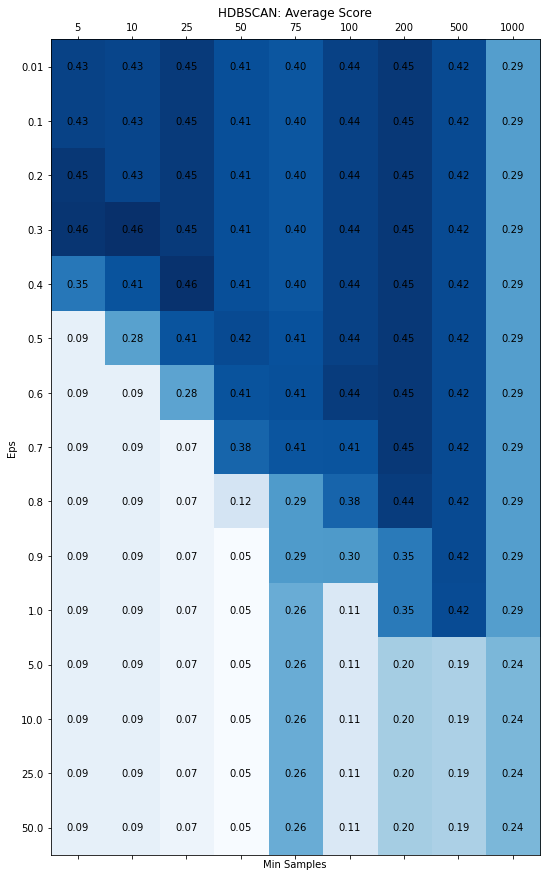

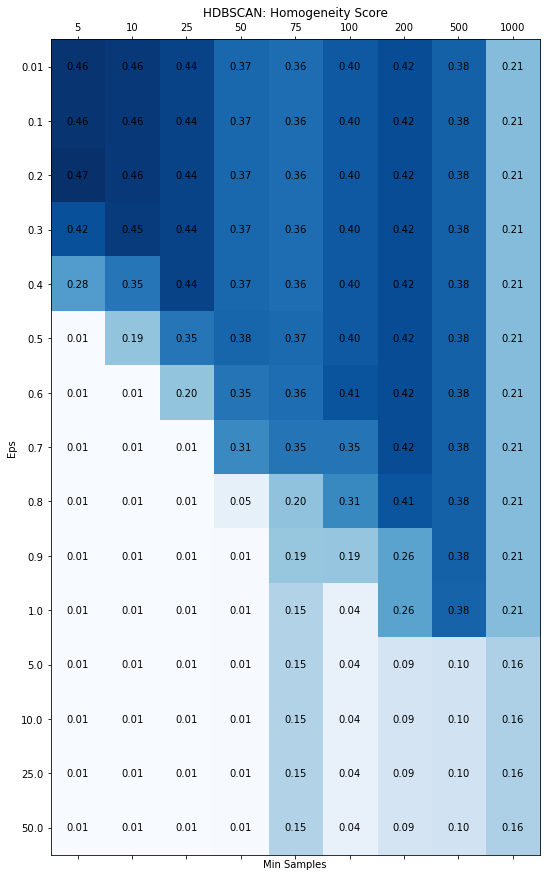

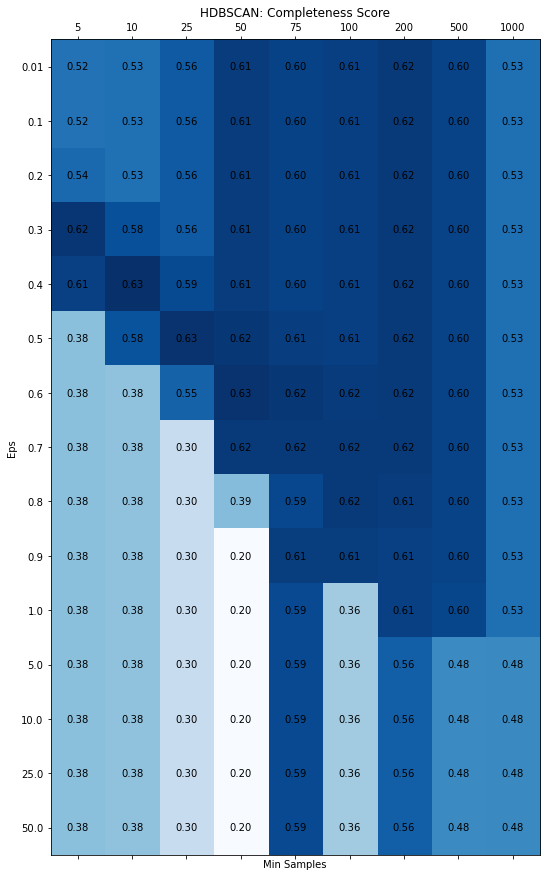

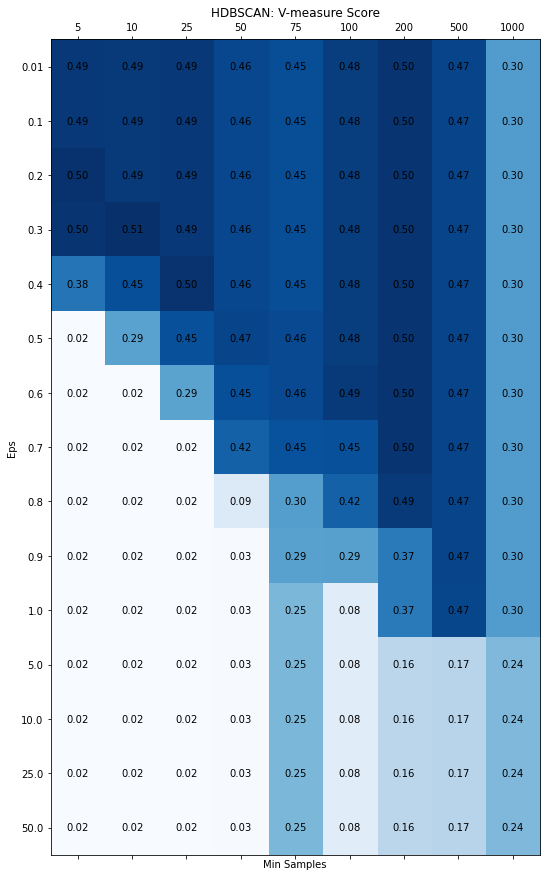

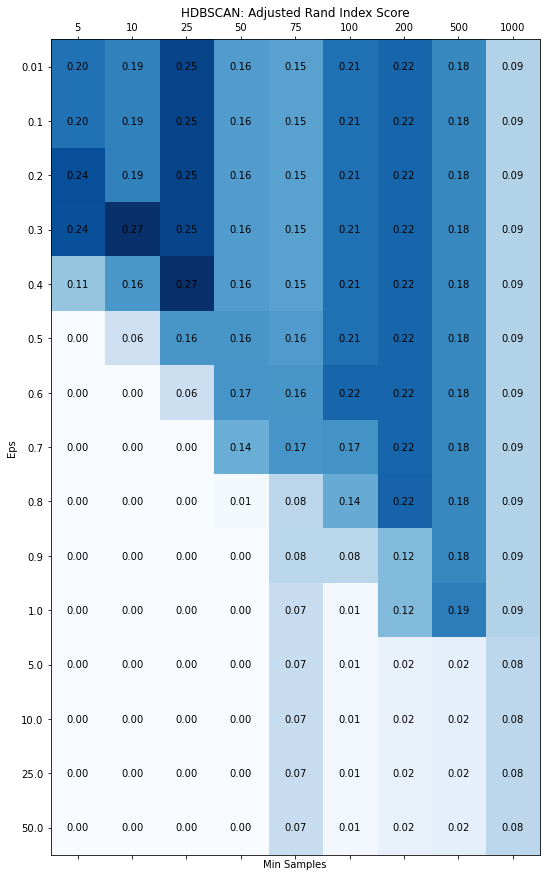

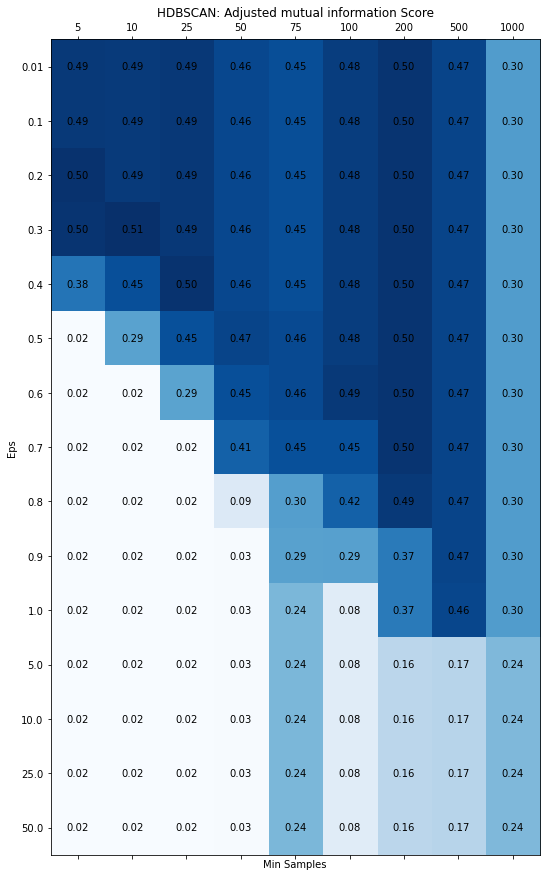

In [17]:
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(avg_score, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("HDBSCAN: Average Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = avg_score[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')

# Homogeneity
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(hs, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("HDBSCAN: Homogeneity Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = hs[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')

# CS
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(cs, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("HDBSCAN: Completeness Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = cs[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')
        
# V-measure
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(vms, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("HDBSCAN: V-measure Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = vms[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')

# Adjusted Rand Index        
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(aris, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("HDBSCAN: Adjusted Rand Index Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = aris[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')
        
# Adjusted mutual information       
fig, ax = plt.subplots(figsize=(15,15))

eps_s = [str(i) for i in eps]
min_samples_s = [str(i) for i in min_samples]

ax.matshow(amis, cmap=plt.cm.Blues)
ax.set_xticks(range(0, len(min_samples)))
ax.set_yticks(range(0, len(eps)))
ax.set_xticklabels(min_samples_s)
ax.set_yticklabels(eps_s)
ax.set_title("HDBSCAN: Adjusted mutual information Score")
ax.set_xlabel('Min Samples')
ax.set_ylabel('Eps')

for i in range(len(eps)):
    for j in range(len(min_samples)):
        c = amis[i,j]
        c_float = "{:.2f}".format(c)
        ax.text(j, i, str(c_float), va='center', ha='center')

In [25]:
def get_max_index(mat):
    return np.unravel_index(np.argmax(mat, axis=None), mat.shape)

eps = [0.5, 5.0]
min_samples = [5,10,30,60,75,100,200,500,1000]
bestHDBSCAN = 0
hs = np.zeros((len(eps), len(min_samples)))
cs = np.zeros((len(eps), len(min_samples)))
vms = np.zeros((len(eps), len(min_samples)))
aris = np.zeros((len(eps), len(min_samples)))
amis = np.zeros((len(eps), len(min_samples)))
avg_score = np.zeros((len(eps), len(min_samples)))

for i in range(len(eps)):
    for j in range(len(min_samples)):
        print(eps[i], min_samples[j])
        
        hdbs = hdbscan.HDBSCAN(min_cluster_size=100, cluster_selection_epsilon=eps[i], min_samples=min_samples[j]).fit_predict(words_count_umap)
        
        hs[i, j] = homogeneity_score(dataset.target, hdbs)
        cs[i, j] = completeness_score(dataset.target, hdbs)
        vms[i, j] = v_measure_score(dataset.target, hdbs)
        aris[i, j] = adjusted_rand_score(dataset.target, hdbs)
        amis[i, j] = adjusted_mutual_info_score(dataset.target, hdbs)

        avg_score[i, j] = (hs[i, j] + cs[i, j] + vms[i, j] + aris[i, j] + amis[i, j]) / 5

        if(avg_score[i, j] > bestHDBSCAN):
            bestHDBSCAN = avg_score[i, j]
            bestEpsHDBSCAN = eps[i]
            bestMinSamplesHDBSCAN = min_samples[j]

print('Best eps for HDBSCAN: ' + str(bestEpsHDBSCAN))
print('Best Min Samples for HDBSCAN: ' + str(bestMinSamplesHDBSCAN))
print('Best Score for HDBSCAN: ' + str(bestHDBSCAN))

print('Best in terms of Adjusted Rand Index score')
(i, j) = get_max_index(aris)
print('Best Score:' + str(aris.max()))
print('Best eps for DBSCAN: ' + str(eps[i]))
print('Best Min Samples for DBSCAN: ' + str(min_samples[j]))

0.5 5
0.5 10
0.5 30
0.5 60
0.5 75
0.5 100
0.5 200
0.5 500
0.5 1000
5.0 5
5.0 10
5.0 30
5.0 60
5.0 75
5.0 100
5.0 200
5.0 500
5.0 1000
Best eps for HDBSCAN: 0.5
Best Min Samples for HDBSCAN: 60
Best Score for HDBSCAN: 0.4657999560785793
Best in terms of Adjusted Rand Index score
Best Score:0.24054549884581522
Best eps for DBSCAN: 0.5
Best Min Samples for DBSCAN: 60


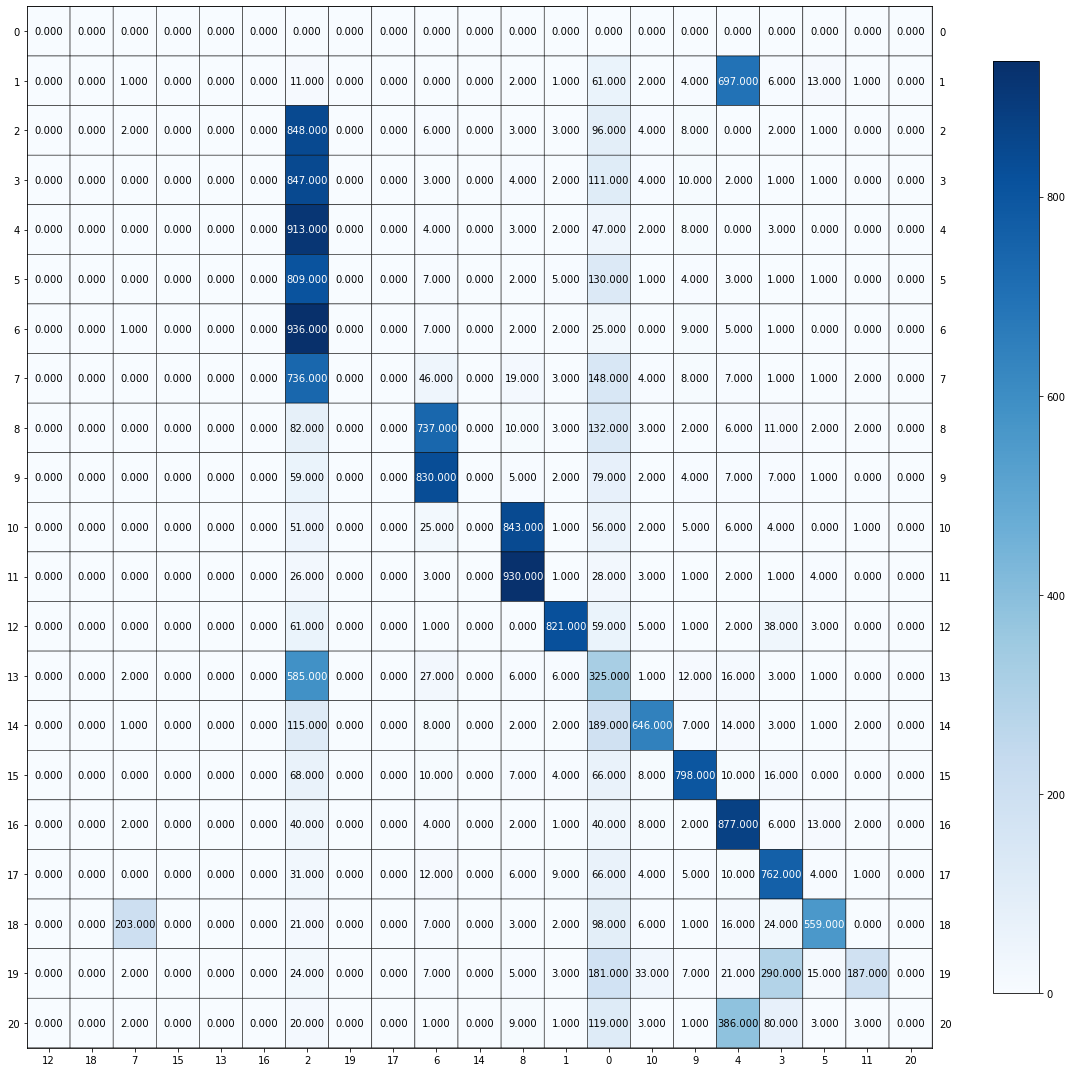

Homogeneity score for DBSCAN: 0.458913
Completeness score for DBSCAN: 0.650827
V-measure score for DBSCAN: 0.538276
Adjusted Rand Index score for DBSCAN: 0.256169
Adjusted mutual information score for DBSCAN: 0.537263


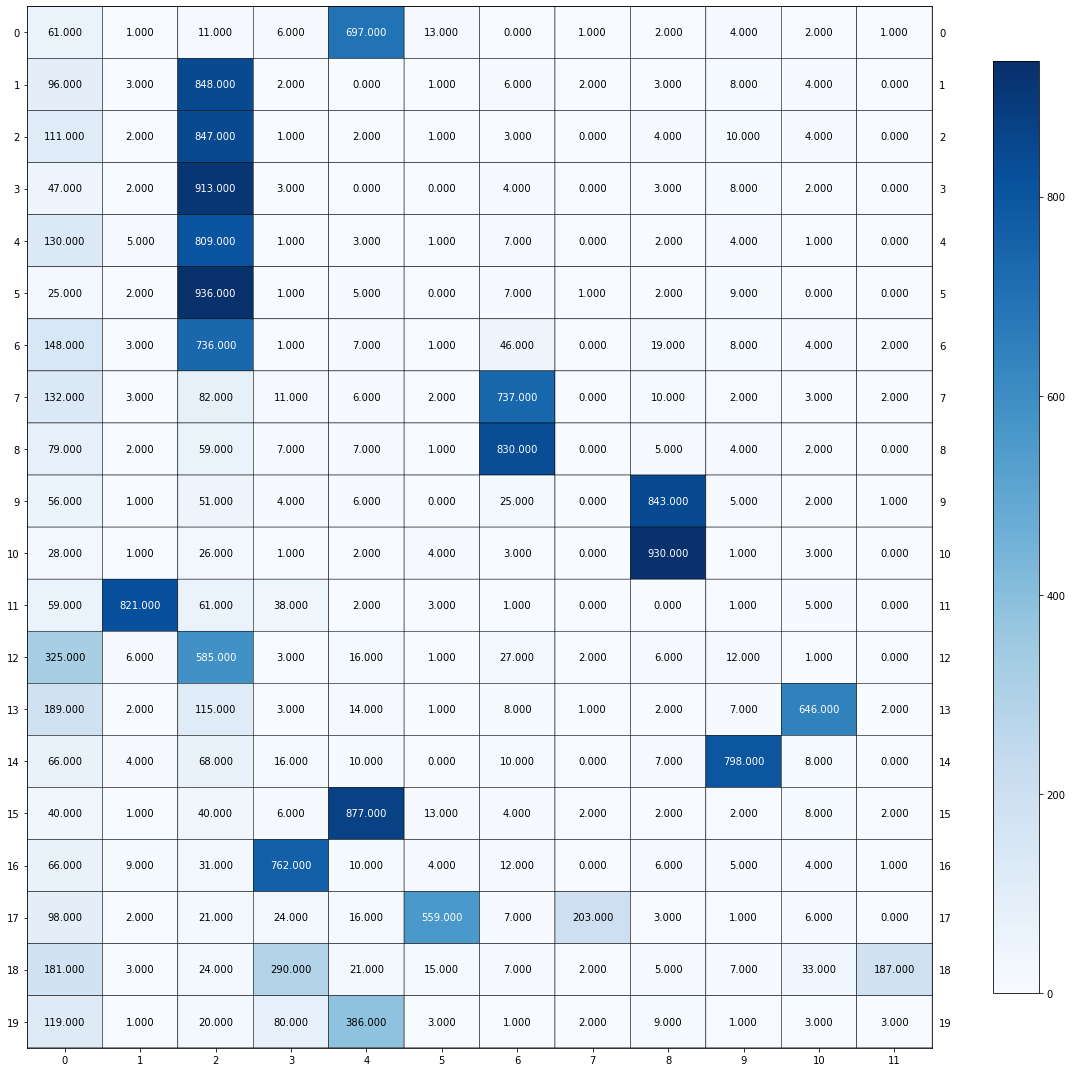

Estimated number of clusters: 11
Estimated number of noise points: 2056


In [18]:
# Best in terms of average score
dbs = DBSCAN(eps = 0.7, min_samples = 200).fit_predict(words_count_umap)
cm = confusion_matrix(dataset.target, dbs)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, dbs, "DBSCAN")
plot_mat(contingency_matrix(dataset.target, dbs), size = (15,15))

n_clusters_ = len(set(dbs)) - (1 if -1 in dbs else 0)
n_noise_ = list(dbs).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

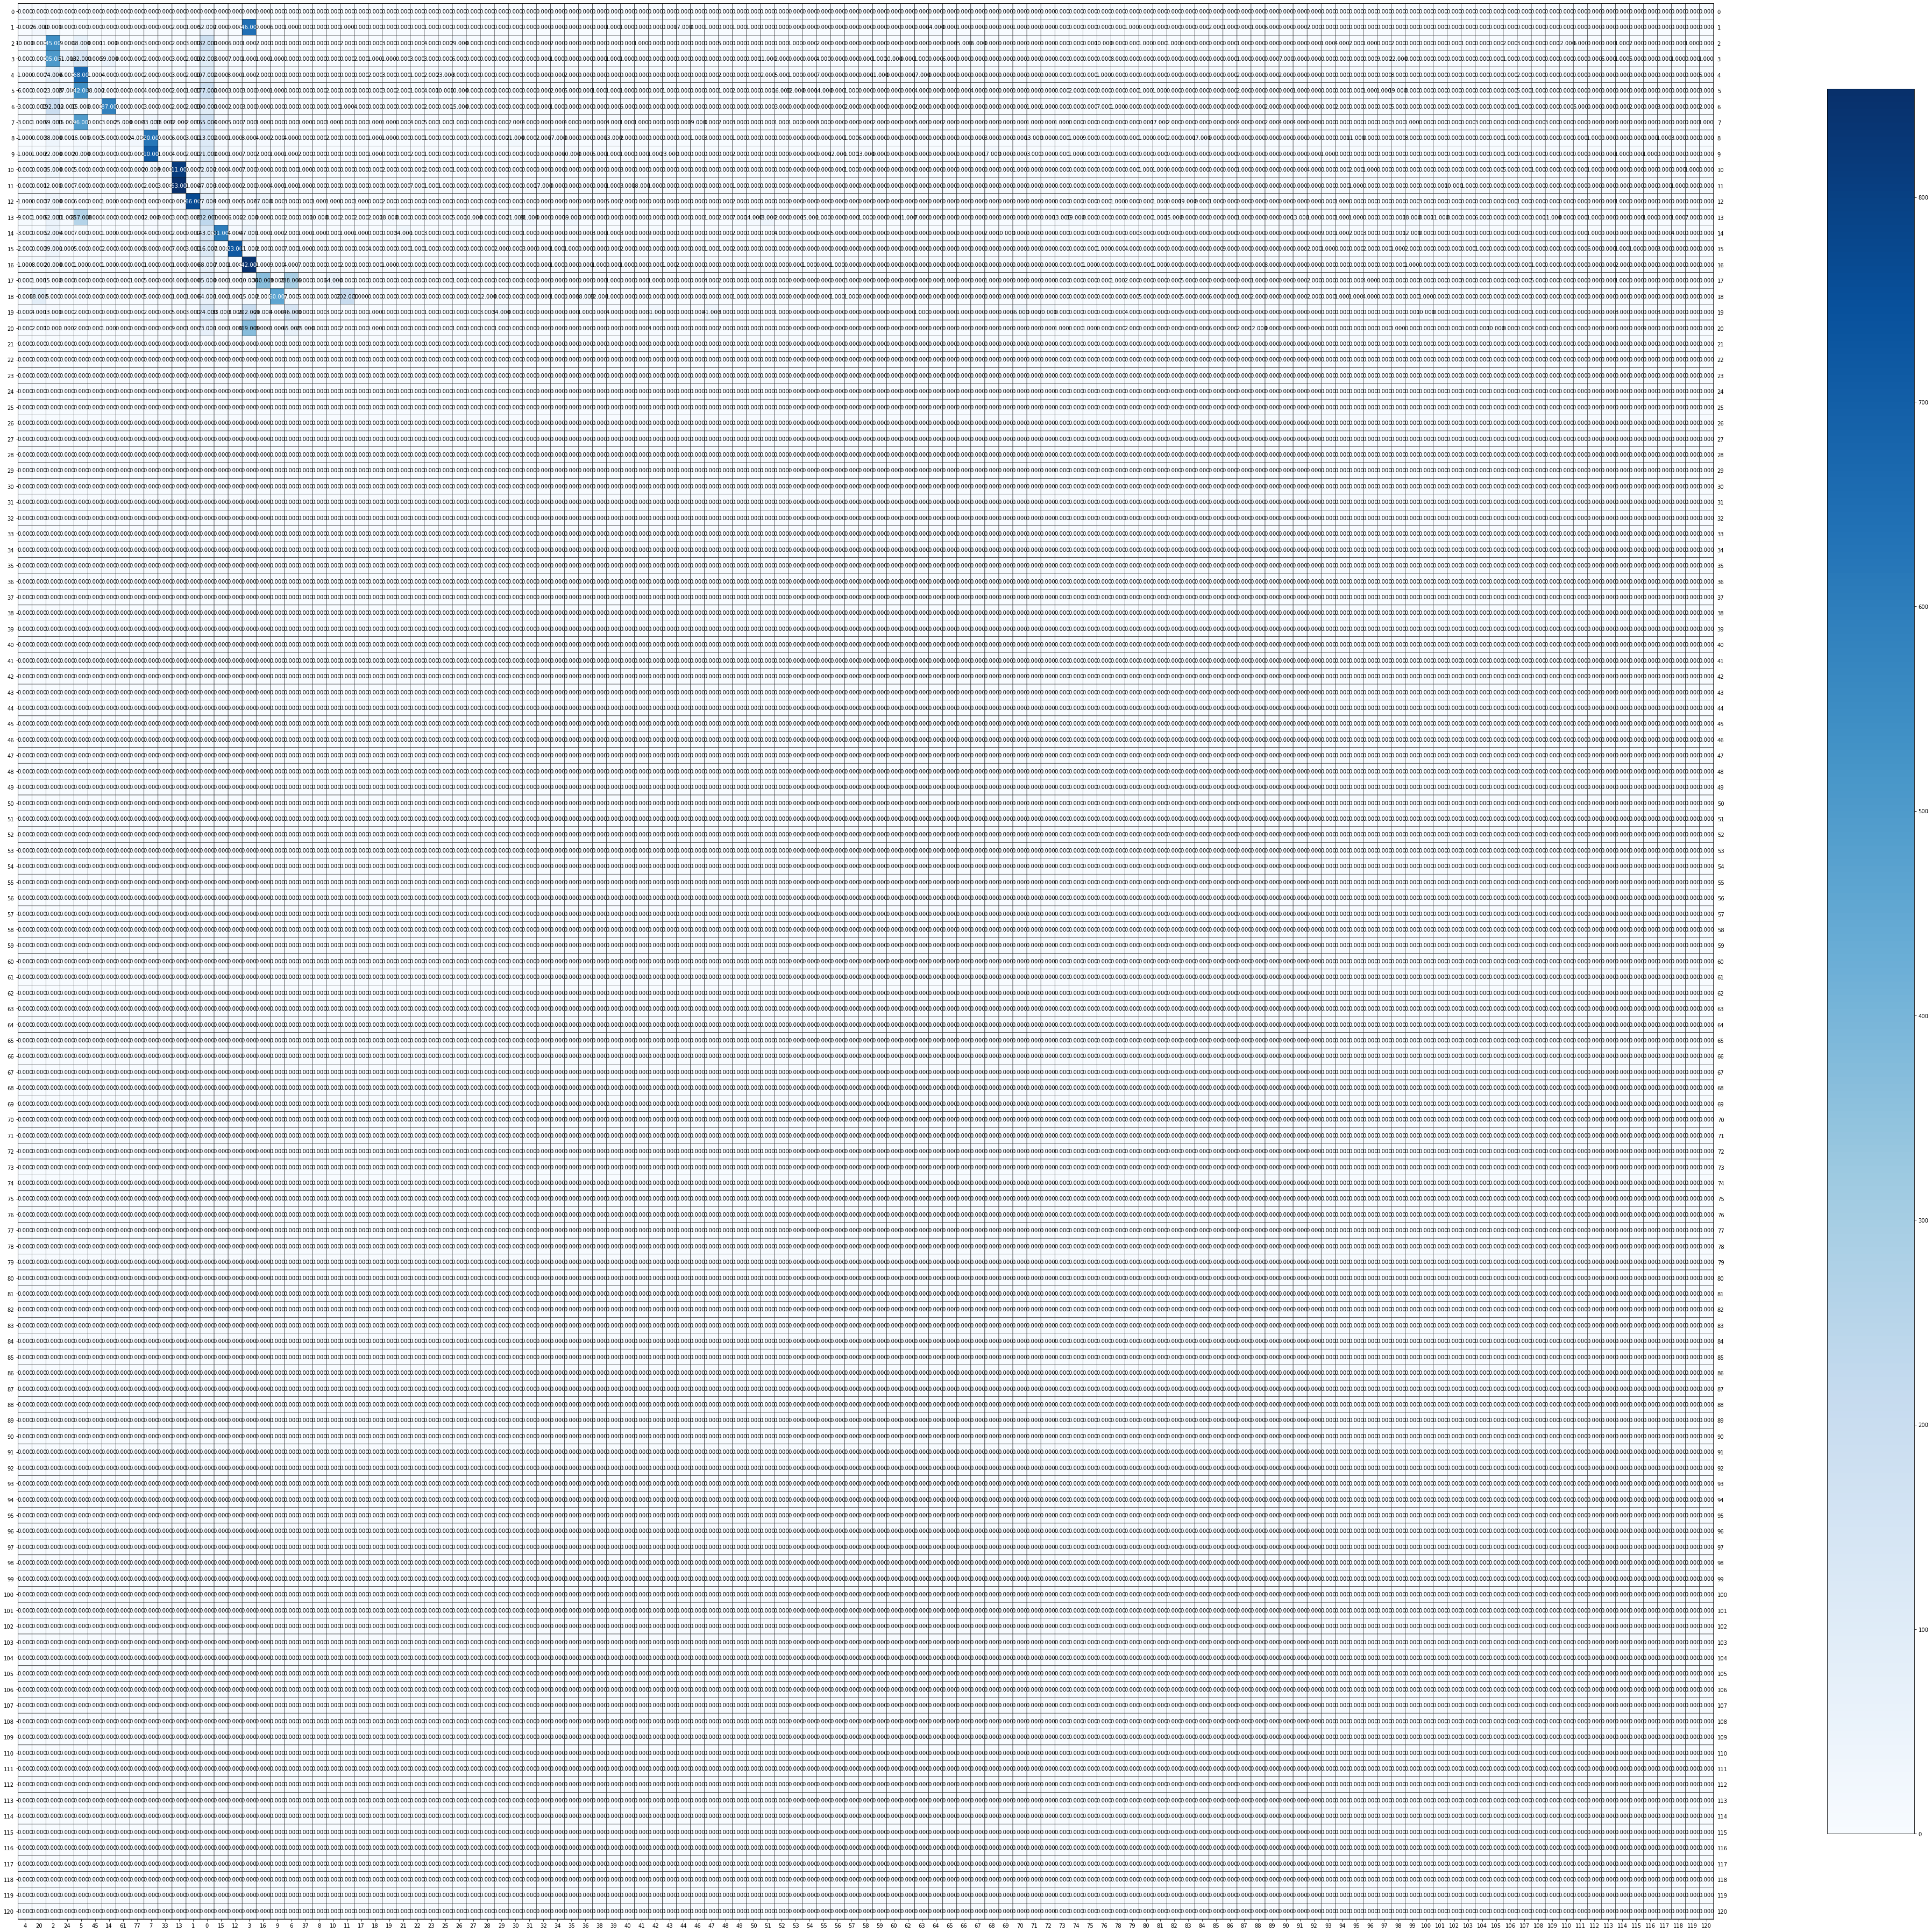

Homogeneity score for DBSCAN: 0.533378
Completeness score for DBSCAN: 0.511711
V-measure score for DBSCAN: 0.522320
Adjusted Rand Index score for DBSCAN: 0.318004
Adjusted mutual information score for DBSCAN: 0.511704


Estimated number of clusters: 120
Estimated number of noise points: 2220


In [20]:
# Best in terms of Rand Score
dbs = DBSCAN(eps = 0.3, min_samples = 10).fit_predict(words_count_umap)
cm = confusion_matrix(dataset.target, dbs)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(50,50), pic_fname = 'dbs_rand.png')
Clustering_Metrics(dataset.target, dbs, "DBSCAN")
plot_mat(contingency_matrix(dataset.target, dbs), size = (100,100), pic_fname = 'dbs_rand2.png')

n_clusters_ = len(set(dbs)) - (1 if -1 in dbs else 0)
n_noise_ = list(dbs).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

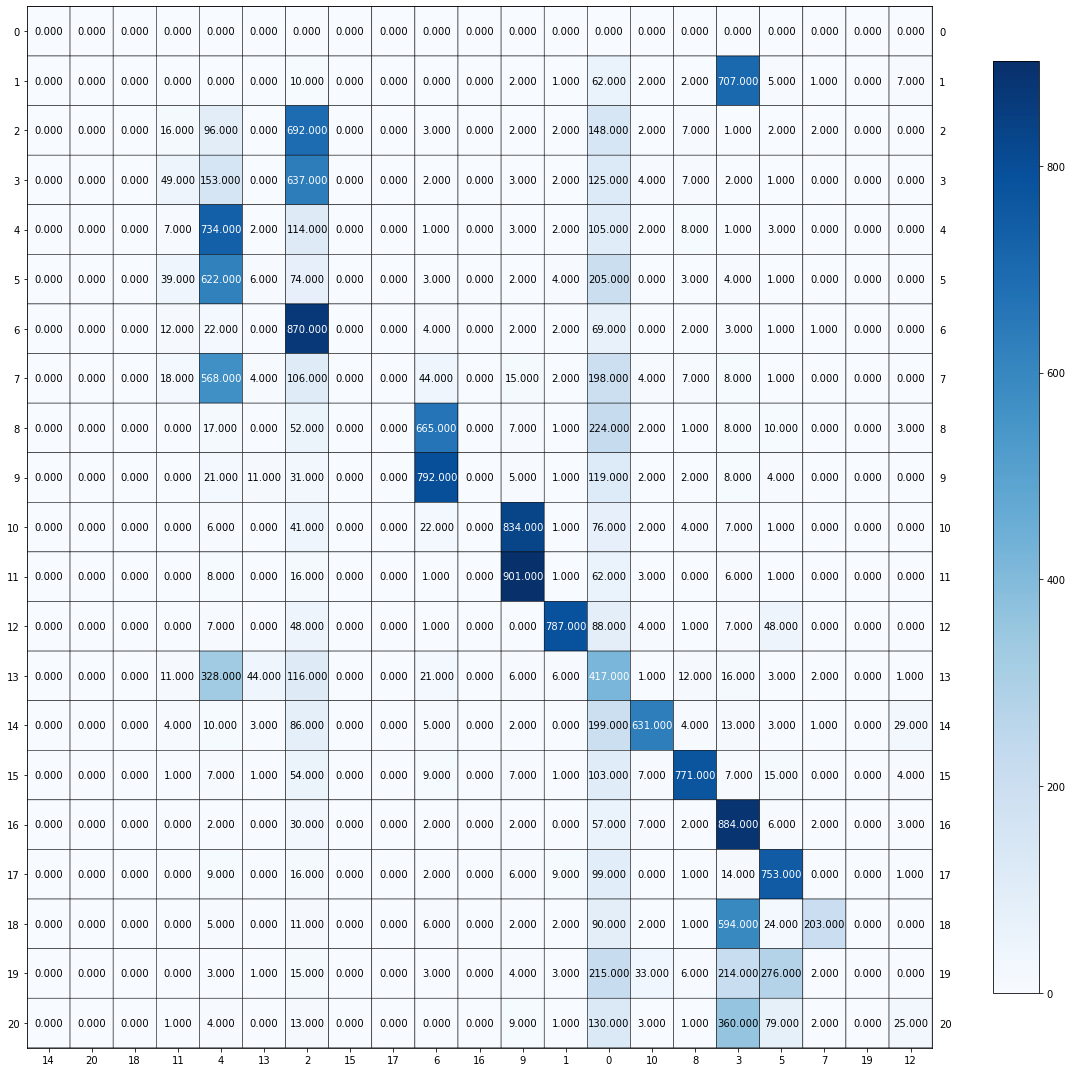

Homogeneity score for DBSCAN: 0.456488
Completeness score for DBSCAN: 0.597696
V-measure score for DBSCAN: 0.517635
Adjusted Rand Index score for DBSCAN: 0.298527
Adjusted mutual information score for DBSCAN: 0.516412


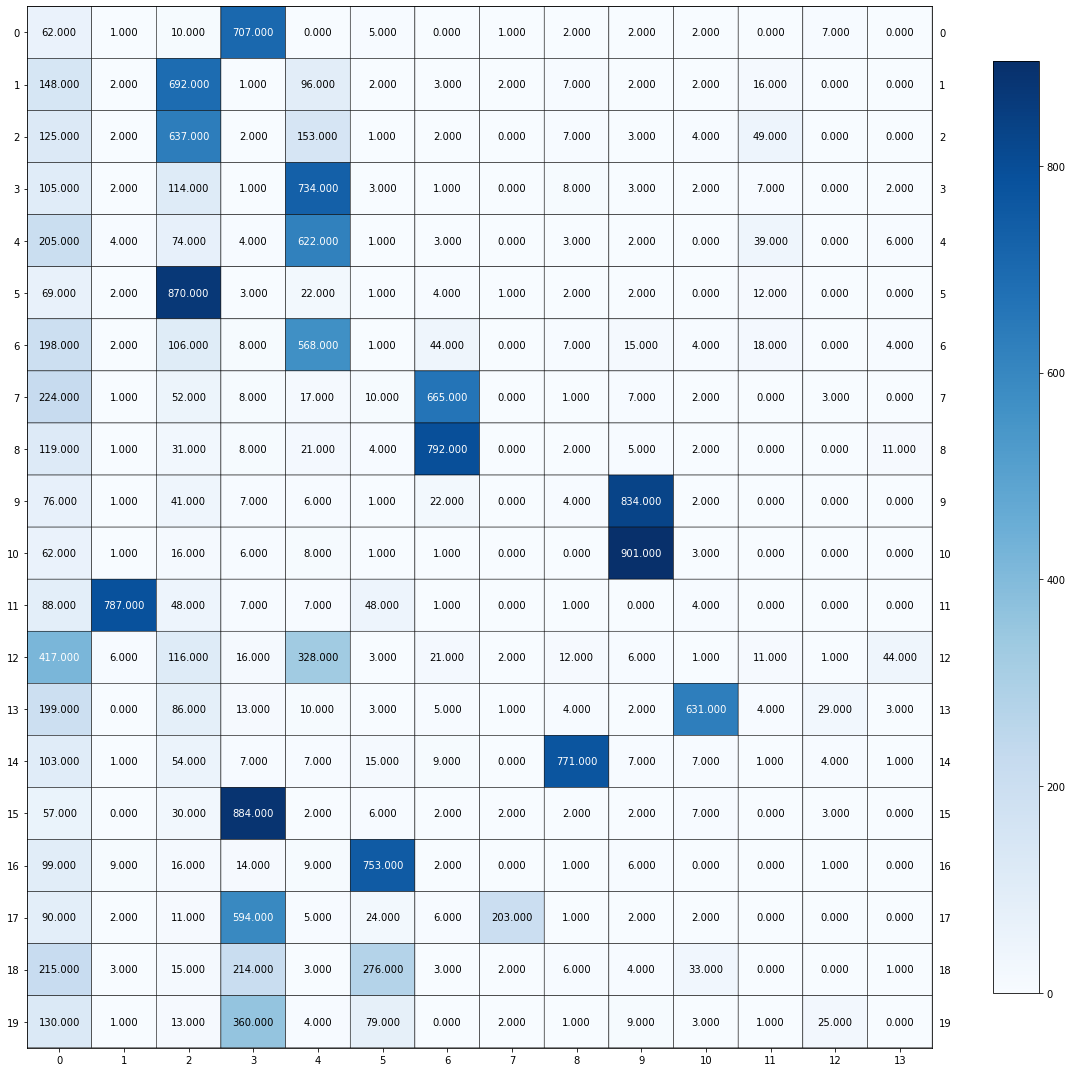

Estimated number of clusters: 13
Estimated number of noise points: 2791


In [26]:
# Best given epsilon is 0.5
dbs = DBSCAN(eps = 0.5, min_samples = 60).fit_predict(words_count_umap)
cm = confusion_matrix(dataset.target, dbs)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, dbs, "DBSCAN")
plot_mat(contingency_matrix(dataset.target, dbs), size = (15,15))

n_clusters_ = len(set(dbs)) - (1 if -1 in dbs else 0)
n_noise_ = list(dbs).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

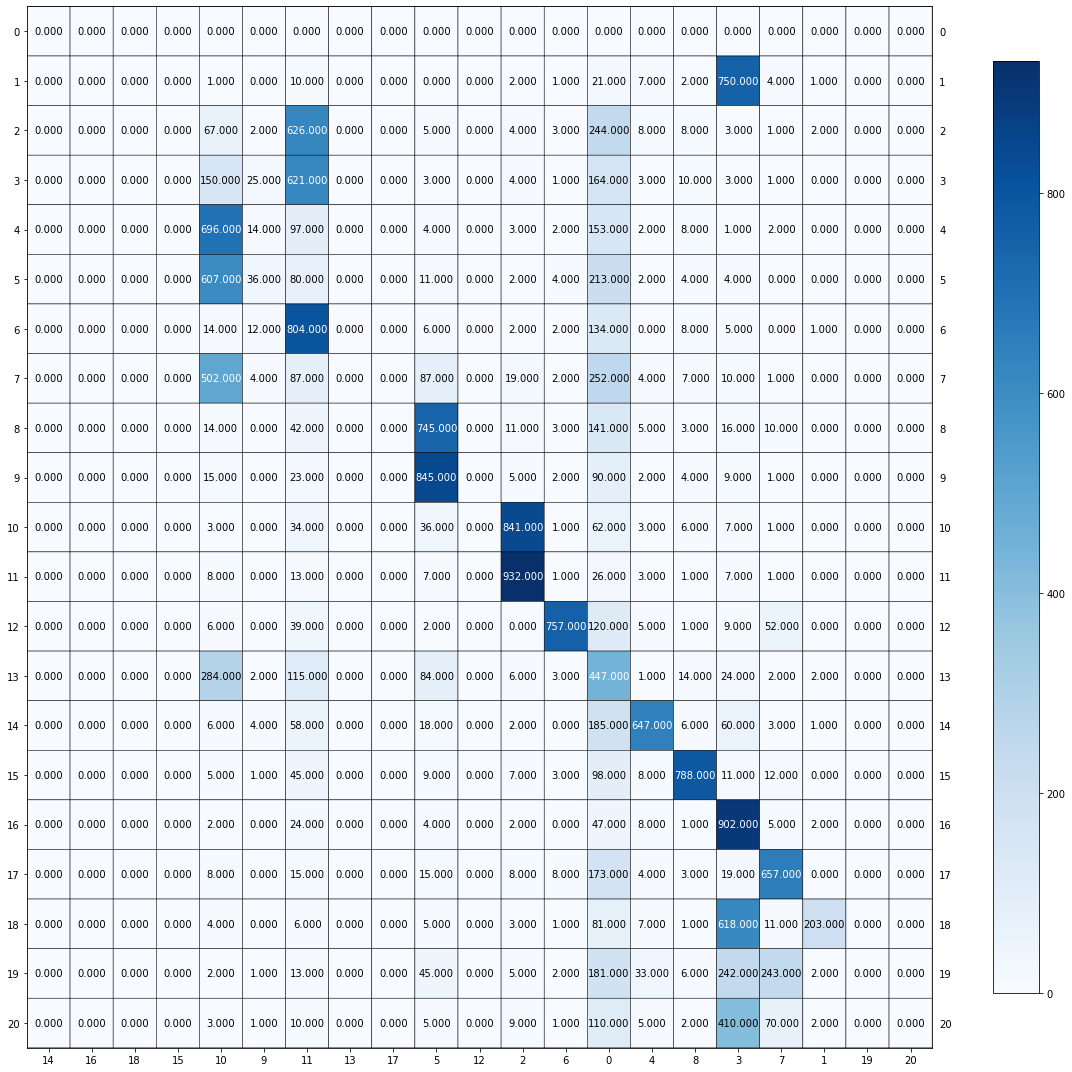

Homogeneity score for HDBSCAN: 0.444601
Completeness score for HDBSCAN: 0.592694
V-measure score for HDBSCAN: 0.508076
Adjusted Rand Index score for HDBSCAN: 0.292700
Adjusted mutual information score for HDBSCAN: 0.507022


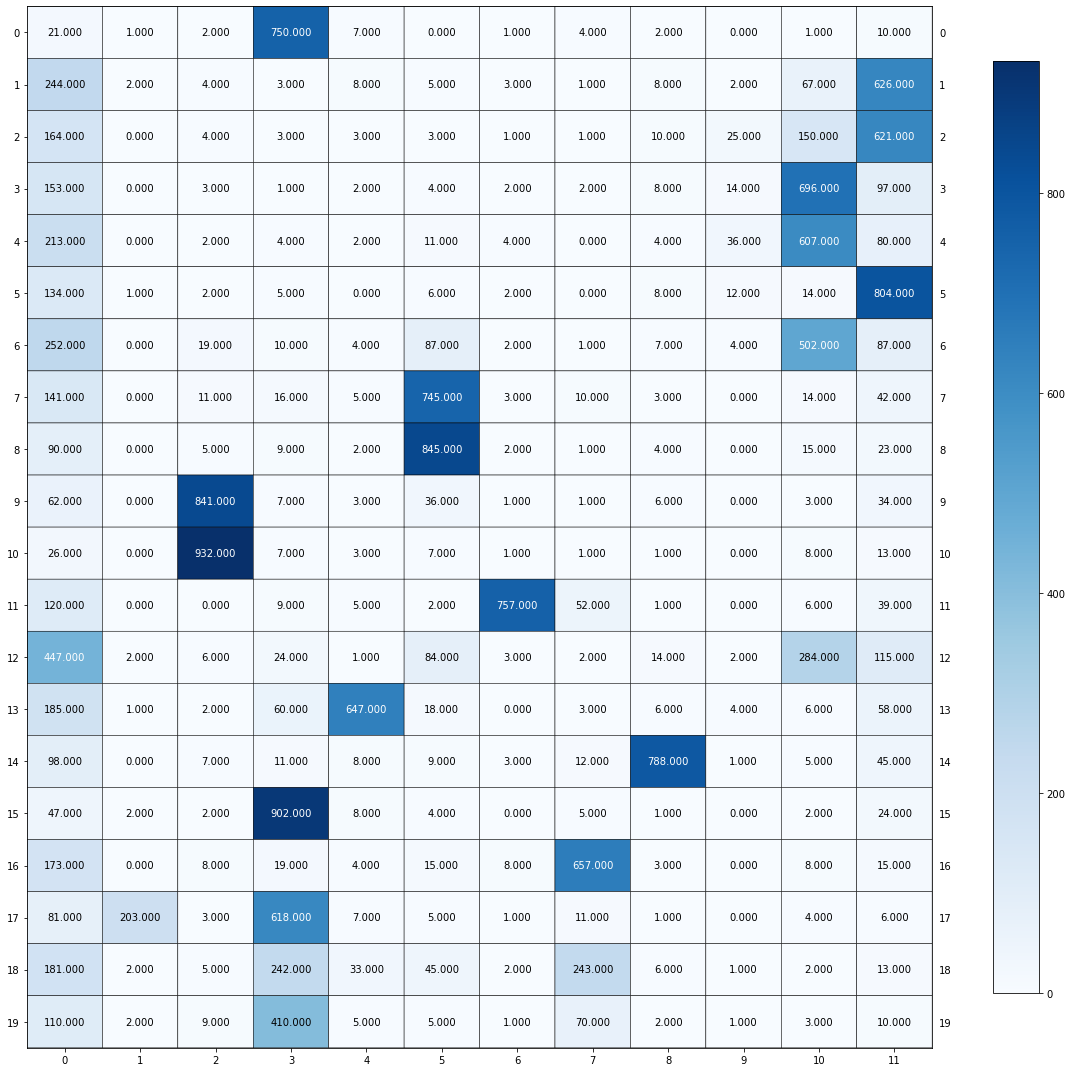

Estimated number of clusters: 11
Estimated number of noise points: 2942


In [22]:
hdbs = hdbscan.HDBSCAN(min_cluster_size=100, cluster_selection_epsilon=0.3, min_samples=5).fit_predict(words_count_umap)
cm = confusion_matrix(dataset.target, hdbs)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, hdbs, "HDBSCAN")
plot_mat(contingency_matrix(dataset.target, hdbs), size = (15,15))

n_clusters_ = len(set(hdbs)) - (1 if -1 in hdbs else 0)
n_noise_ = list(hdbs).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

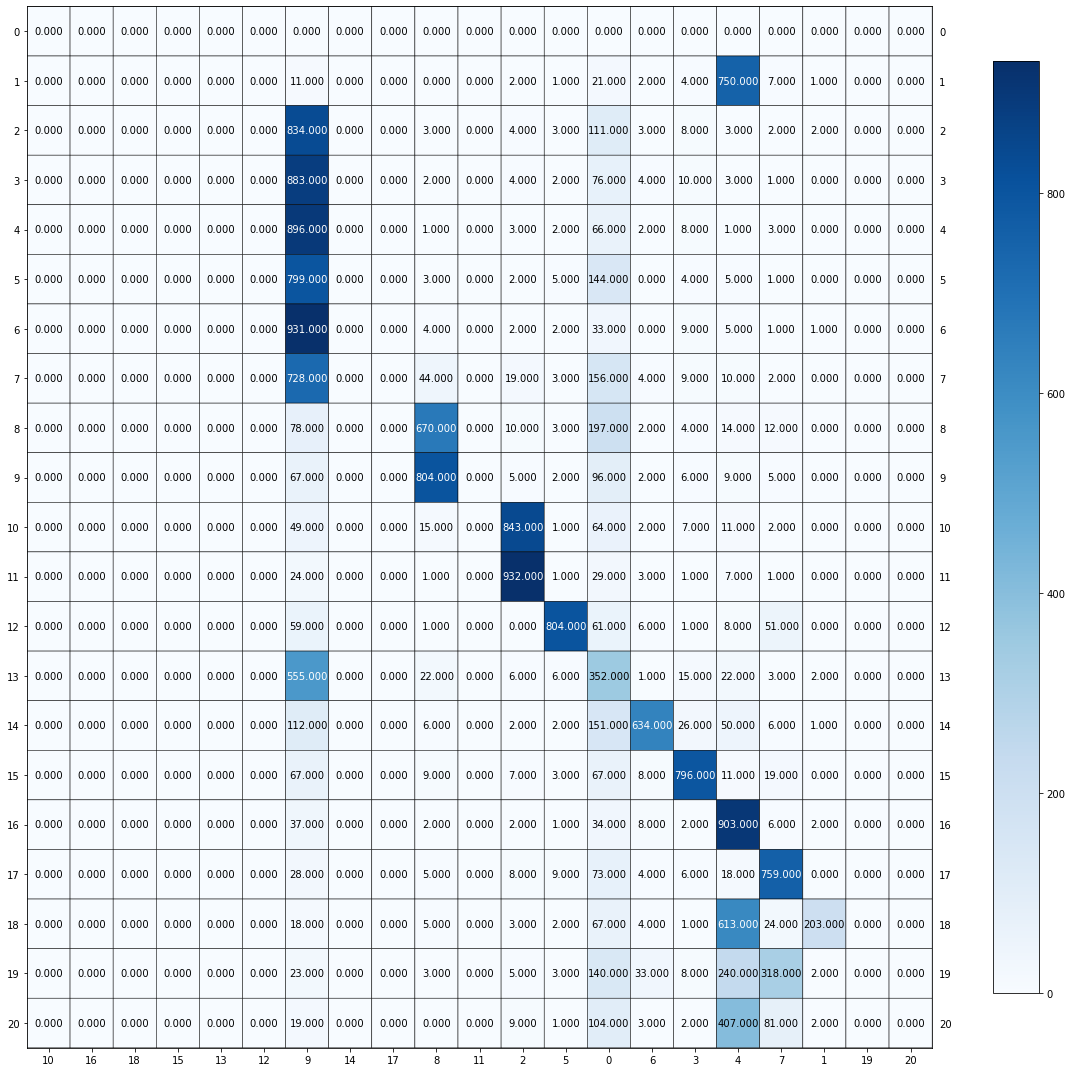

Homogeneity score for HDBSCAN: 0.426188
Completeness score for HDBSCAN: 0.639910
V-measure score for HDBSCAN: 0.511626
Adjusted Rand Index score for HDBSCAN: 0.240545
Adjusted mutual information score for HDBSCAN: 0.510731


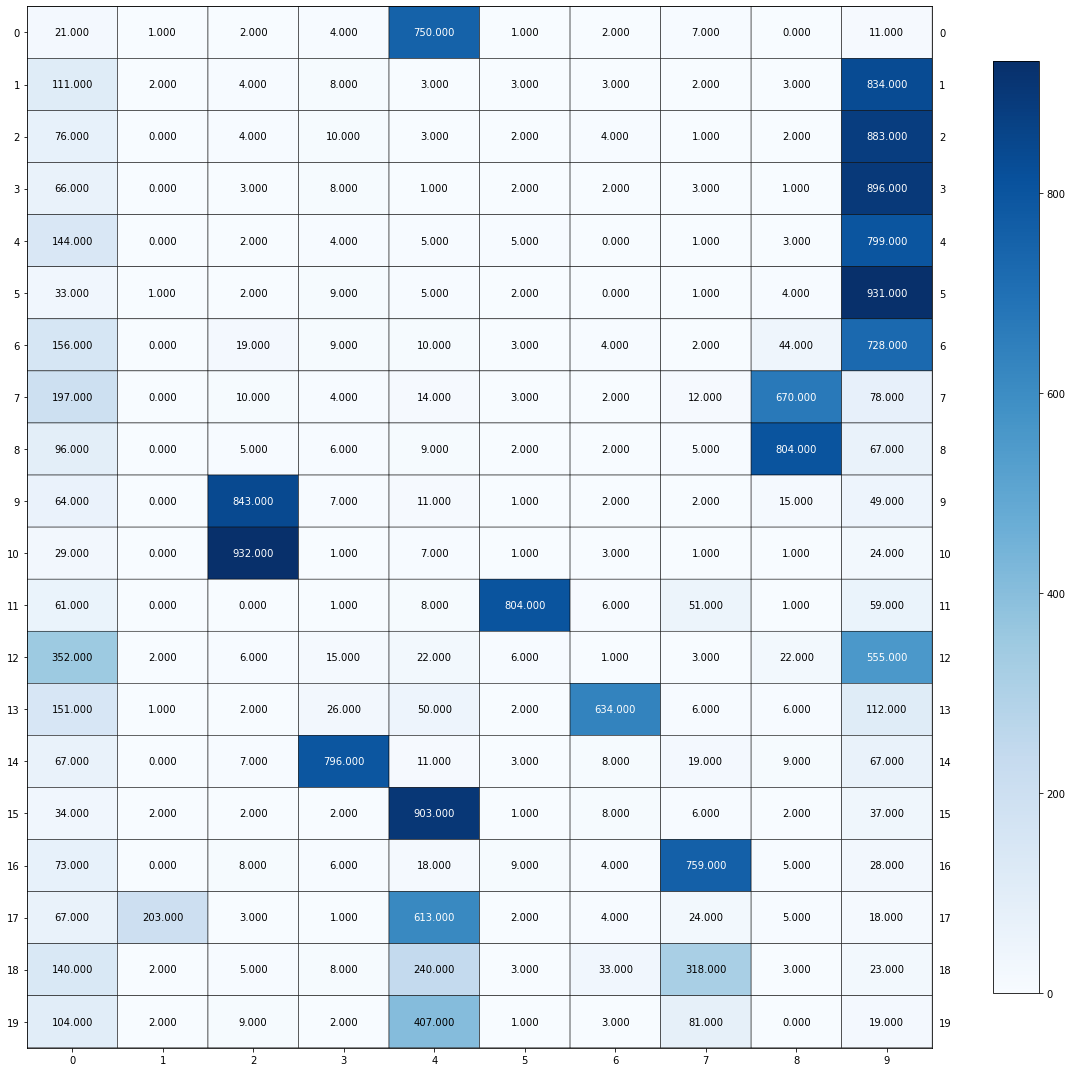

Estimated number of clusters: 9
Estimated number of noise points: 2042


In [27]:
# Best results given eps = 0.5
hdbs = hdbscan.HDBSCAN(min_cluster_size=100, cluster_selection_epsilon=0.5, min_samples=60).fit_predict(words_count_umap)
cm = confusion_matrix(dataset.target, hdbs)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))
Clustering_Metrics(dataset.target, hdbs, "HDBSCAN")
plot_mat(contingency_matrix(dataset.target, hdbs), size = (15,15))

n_clusters_ = len(set(hdbs)) - (1 if -1 in hdbs else 0)
n_noise_ = list(hdbs).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# QUESTION 17: 
    
Based on your experiments, which dimensionality reduction technique and clus- tering methods worked best together for 20-class text data and why? Follow the table below.

In [1]:
#!pip install pandas
#!pip install numpy
!pip install regex
!pip install nltk
!pip install sklearn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
import random
import nltk
import multiprocessing
import umap.umap_ as umap
import umap.plot
import re
import string
import warnings
from tabulate import tabulate
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.datasets import make_classification, fetch_20newsgroups
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.optimize import linear_sum_assignment
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from joblib import Memory
from tempfile import mkdtemp
from string import punctuation
from nltk import pos_tag, word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import joblib
import hdbscan
import plotmat
from plotmat import plot_mat

np.random.seed(0)
random.seed(0)

dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
count_vec = CountVectorizer(stop_words="english", min_df=3)
tfidf_tranformer = TfidfTransformer(use_idf=True)

data = pd.DataFrame(dataset.data)
print(data.head())

word_count_vec = count_vec.fit_transform(dataset.data)
word_count_vec_tf = tfidf_tranformer.fit_transform(word_count_vec)
word_count_array = word_count_vec_tf.toarray()
word_counts = pd.DataFrame(data=word_count_array, columns = count_vec.get_feature_names())

print(word_counts.shape)

def Clustering_Metrics(y_test, y_pred, name=""):
    print("Homogeneity score for %s: %f" %(name, homogeneity_score(y_test, y_pred)))
    print("Completeness score for %s: %f" % (name, completeness_score(y_test, y_pred)))
    print("V-measure score for %s: %f" % (name, v_measure_score(y_test, y_pred)))
    print("Adjusted Rand Index score for %s: %f" % (name, adjusted_rand_score(y_test, y_pred)))
    print("Adjusted mutual information score for %s: %f" % (name, adjusted_mutual_info_score(y_test, y_pred)))

zsh:1: no matches found: umap-learn[plot]


/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/umap/plot.py:66: UserWarning: Trying to register the cmap 'fire' which already exists.
  plt.register_cmap("fire", fire_cmap)


                                                   0
0  FOR SALE\n\n                 1945 King Feature...
1  Earlier today I read an ad for REAL-3D animati...
2  Can someone cite Biblical references to homose...
3  My friends and I have a buch of books for sale...
4  maa@plato.ds.boeing.com (Mark A Allyn) writes:...
(18846, 45365)


## Divided and run the code
### Dimensionality Reduction - SVD

In [9]:
reduce_dim = [TruncatedSVD(n_components=5, random_state=42), 
               TruncatedSVD(n_components=20, random_state=42), 
               TruncatedSVD(n_components=200, random_state=42),
               umap.UMAP(n_components=5, metric='cosine'),
               umap.UMAP(n_components=20, metric='cosine'),
               umap.UMAP(n_components=200, metric='cosine'),
               NMF(n_components=5, init='random', random_state=42),
               NMF(n_components=20, init='random', random_state=42),
               NMF(n_components=200, init='random', random_state=42)]

cluster = [KMeans(init='k-means++', max_iter=1000, n_clusters=10, n_init=30, random_state=0),
                KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0),
                KMeans(init='k-means++', max_iter=1000, n_clusters=50, n_init=30, random_state=0),
                AgglomerativeClustering(n_clusters=20, linkage='ward'),
                DBSCAN(eps = 0.5, min_samples = 200),
                DBSCAN(eps = 5, min_samples = 200),
                hdbscan.HDBSCAN(min_cluster_size=100, cluster_selection_epsilon=0.01, min_samples=50),
                hdbscan.HDBSCAN(min_cluster_size=200, cluster_selection_epsilon=0.01, min_samples=50)]  

hs = np.zeros((len(reduce_dim), len(cluster)))
cs = np.zeros((len(reduce_dim), len(cluster)))
vms = np.zeros((len(reduce_dim), len(cluster)))
aris = np.zeros((len(reduce_dim), len(cluster)))
amis = np.zeros((len(reduce_dim), len(cluster)))
avg_score = np.zeros((len(reduce_dim), len(cluster)))
bestScore = 0

for i in range(3):
    for j in range(len(cluster)):
        red_d = reduce_dim[i]
        words_count_red = red_d.fit_transform(word_counts)
        clus = cluster[j]
        result = clus.fit_predict(words_count_red)
        Clustering_Metrics(dataset.target, result, str(reduce_dim[i]) + ', ' + str(cluster[j]))
        
        hs[i, j] = homogeneity_score(dataset.target, result)
        cs[i, j] = completeness_score(dataset.target, result)
        vms[i, j] = v_measure_score(dataset.target, result)
        aris[i, j] = adjusted_rand_score(dataset.target, result)
        amis[i, j] = adjusted_mutual_info_score(dataset.target, result)

        avg_score[i, j] = (hs[i, j] + cs[i, j] + vms[i, j] + aris[i, j] + amis[i, j]) / 5

        if(avg_score[i, j] > bestScore):
            bestScore = avg_score[i, j]
            bestRedDim = reduce_dim[i]
            bestCluster = cluster[j]

Homogeneity score for TruncatedSVD(n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.270790
Completeness score for TruncatedSVD(n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.417480
V-measure score for TruncatedSVD(n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.328503
Adjusted Rand Index score for TruncatedSVD(n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.106072
Adjusted mutual information score for TruncatedSVD(n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.327259
Homogeneity score for TruncatedSVD(n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0): 0.322084
Completeness score for TruncatedSVD(n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=20, n_init=30, r

In [3]:
def get_max_index(mat):
    return np.unravel_index(np.argmax(mat, axis=None), mat.shape)

print('Best in terms of Homogeneity score')
(i, j) = get_max_index(hs)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(hs.max()))
      
print('Best in terms of Completeness score')
cs_without_outiers = np.zeros((len(reduce_dim), len(cluster)))

for i in range(len(cs)):
    for j in range(len(cs[i])):
        if cs[i][j] != 1:
            cs_without_outiers[i][j] = cs[i][j]
        else:
            cs_without_outiers[i][j] = 0.0

(i, j) = get_max_index(cs_without_outiers)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(cs_without_outiers.max()))
      
print('Best in terms of V-measure score')
(i, j) = get_max_index(vms)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(vms.max()))
      
print('Best in terms of Adjusted Rand Index score')
(i, j) = get_max_index(aris)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(aris.max()))
      
print('Best in terms of Adjusted mutual information score')
(i, j) = get_max_index(amis)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(amis.max()))
      
print('Best in terms of Average score')
(i, j) = get_max_index(avg_score)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(avg_score.max()))

Best in terms of Homogeneity score
TruncatedSVD(n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=50, n_init=30, random_state=0)
Best Score:0.42027012154807813
Best in terms of Completeness score
TruncatedSVD(n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0)
Best Score:0.4980928072344627
Best in terms of V-measure score
TruncatedSVD(n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=50, n_init=30, random_state=0)
Best Score:0.39759075599018107
Best in terms of Adjusted Rand Index score
TruncatedSVD(n_components=20, random_state=42), AgglomerativeClustering(n_clusters=20)
Best Score:0.15174901635733087
Best in terms of Adjusted mutual information score
TruncatedSVD(n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=50, n_init=30, random_state=0)
Best Score:0.3926866710565674
Best in terms of Average score
TruncatedSVD(n_components=200, random_state=42), KMeans(max_iter=1000, n_cluste

### Dimensionality Reduction - UMAP(5,20)

In [2]:
reduce_dim = [TruncatedSVD(n_components=5, random_state=42), 
               TruncatedSVD(n_components=20, random_state=42), 
               TruncatedSVD(n_components=200, random_state=42),
               umap.UMAP(n_components=5, metric='cosine'),
               umap.UMAP(n_components=20, metric='cosine'),
               umap.UMAP(n_components=200, metric='cosine'),
               NMF(n_components=5, init='random', random_state=42),
               NMF(n_components=20, init='random', random_state=42),
               NMF(n_components=200, init='random', random_state=42)]

cluster = [KMeans(init='k-means++', max_iter=1000, n_clusters=10, n_init=30, random_state=0),
                KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0),
                KMeans(init='k-means++', max_iter=1000, n_clusters=50, n_init=30, random_state=0),
                AgglomerativeClustering(n_clusters=20, linkage='ward'),
                DBSCAN(eps = 0.5, min_samples = 200),
                DBSCAN(eps = 5, min_samples = 200),
                hdbscan.HDBSCAN(min_cluster_size=100, cluster_selection_epsilon=0.01, min_samples=50),
                hdbscan.HDBSCAN(min_cluster_size=200, cluster_selection_epsilon=0.01, min_samples=50)]  

hs = np.zeros((len(reduce_dim), len(cluster)))
cs = np.zeros((len(reduce_dim), len(cluster)))
vms = np.zeros((len(reduce_dim), len(cluster)))
aris = np.zeros((len(reduce_dim), len(cluster)))
amis = np.zeros((len(reduce_dim), len(cluster)))
avg_score = np.zeros((len(reduce_dim), len(cluster)))
bestScore = 0

count = 1

for i in range(3, 5):
    red_d = reduce_dim[i]
    words_count_red = red_d.fit_transform(word_counts)
    
    for j in range(len(cluster)):
        print(count)
        count += 1
        
        clus = cluster[j]
        result = clus.fit_predict(words_count_red)
        Clustering_Metrics(dataset.target, result, str(reduce_dim[i]) + ', ' + str(cluster[j]))
        
        hs[i, j] = homogeneity_score(dataset.target, result)
        cs[i, j] = completeness_score(dataset.target, result)
        vms[i, j] = v_measure_score(dataset.target, result)
        aris[i, j] = adjusted_rand_score(dataset.target, result)
        amis[i, j] = adjusted_mutual_info_score(dataset.target, result)

        avg_score[i, j] = (hs[i, j] + cs[i, j] + vms[i, j] + aris[i, j] + amis[i, j]) / 5

        if(avg_score[i, j] > bestScore):
            bestScore = avg_score[i, j]
            bestRedDim = reduce_dim[i]
            bestCluster = cluster[j]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


1
Homogeneity score for UMAP(angular_rp_forest=True, metric='cosine', n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.453723
Completeness score for UMAP(angular_rp_forest=True, metric='cosine', n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.641403
V-measure score for UMAP(angular_rp_forest=True, metric='cosine', n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.531481
Adjusted Rand Index score for UMAP(angular_rp_forest=True, metric='cosine', n_components=5, tqdm_kwds=

In [3]:
def get_max_index(mat):
    return np.unravel_index(np.argmax(mat, axis=None), mat.shape)

print('Best in terms of Homogeneity score')
(i, j) = get_max_index(hs)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(hs.max()))
      
print('Best in terms of Completeness score')
cs_without_outiers = np.zeros((len(reduce_dim), len(cluster)))

for i in range(len(cs)):
    for j in range(len(cs[i])):
        if cs[i][j] != 1:
            cs_without_outiers[i][j] = cs[i][j]
        else:
            cs_without_outiers[i][j] = 0.0

(i, j) = get_max_index(cs_without_outiers)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(cs_without_outiers.max()))
      
print('Best in terms of V-measure score')
(i, j) = get_max_index(vms)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(vms.max()))
      
print('Best in terms of Adjusted Rand Index score')
(i, j) = get_max_index(aris)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(aris.max()))
      
print('Best in terms of Adjusted mutual information score')
(i, j) = get_max_index(amis)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(amis.max()))
      
print('Best in terms of Average score')
(i, j) = get_max_index(avg_score)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(avg_score.max()))

Best in terms of Homogeneity score
UMAP(angular_rp_forest=True, metric='cosine', n_components=20, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=50, n_init=30, random_state=0)
Best Score:0.6283735698820675
Best in terms of Completeness score
UMAP(angular_rp_forest=True, metric='cosine', n_components=20, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0)
Best Score:0.6550236903324425
Best in terms of V-measure score
UMAP(angular_rp_forest=True, metric='cosine', n_components=20, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0)
Best Score:0.5909312156272475
Be

### Dimensionality Reduction - UMAP(200) and NMF

In [4]:
reduce_dim = [TruncatedSVD(n_components=5, random_state=42), 
               TruncatedSVD(n_components=20, random_state=42), 
               TruncatedSVD(n_components=200, random_state=42),
               umap.UMAP(n_components=5, metric='cosine'),
               umap.UMAP(n_components=20, metric='cosine'),
               umap.UMAP(n_components=200, metric='cosine'),
               NMF(n_components=5, init='random', random_state=42),
               NMF(n_components=20, init='random', random_state=42),
               NMF(n_components=200, init='random', random_state=42)]

cluster = [KMeans(init='k-means++', max_iter=1000, n_clusters=10, n_init=30, random_state=0),
                KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0),
                KMeans(init='k-means++', max_iter=1000, n_clusters=50, n_init=30, random_state=0),
                AgglomerativeClustering(n_clusters=20, linkage='ward'),
                DBSCAN(eps = 0.5, min_samples = 200),
                DBSCAN(eps = 5, min_samples = 200),
                hdbscan.HDBSCAN(min_cluster_size=100, cluster_selection_epsilon=0.01, min_samples=50),
                hdbscan.HDBSCAN(min_cluster_size=200, cluster_selection_epsilon=0.01, min_samples=50)]  

hs = np.zeros((len(reduce_dim), len(cluster)))
cs = np.zeros((len(reduce_dim), len(cluster)))
vms = np.zeros((len(reduce_dim), len(cluster)))
aris = np.zeros((len(reduce_dim), len(cluster)))
amis = np.zeros((len(reduce_dim), len(cluster)))
avg_score = np.zeros((len(reduce_dim), len(cluster)))
bestScore = 0

count = 1

for i in range(5, 9):
    red_d = reduce_dim[i]
    words_count_red = red_d.fit_transform(word_counts)
    
    for j in range(len(cluster)):
        print(count)
        count += 1
        
        clus = cluster[j]
        result = clus.fit_predict(words_count_red)
        Clustering_Metrics(dataset.target, result, str(reduce_dim[i]) + ', ' + str(cluster[j]))
        
        hs[i, j] = homogeneity_score(dataset.target, result)
        cs[i, j] = completeness_score(dataset.target, result)
        vms[i, j] = v_measure_score(dataset.target, result)
        aris[i, j] = adjusted_rand_score(dataset.target, result)
        amis[i, j] = adjusted_mutual_info_score(dataset.target, result)

        avg_score[i, j] = (hs[i, j] + cs[i, j] + vms[i, j] + aris[i, j] + amis[i, j]) / 5

        if(avg_score[i, j] > bestScore):
            bestScore = avg_score[i, j]
            bestRedDim = reduce_dim[i]
            bestCluster = cluster[j]

1
Homogeneity score for UMAP(angular_rp_forest=True, metric='cosine', n_components=200, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.458814
Completeness score for UMAP(angular_rp_forest=True, metric='cosine', n_components=200, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.650351
V-measure score for UMAP(angular_rp_forest=True, metric='cosine', n_components=200, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.538044
Adjusted Rand Index score for UMAP(angular_rp_forest=True, metric='cosine', n_components=200, tq

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


9
Homogeneity score for NMF(init='random', n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.232200
Completeness score for NMF(init='random', n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.346815
V-measure score for NMF(init='random', n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.278163
Adjusted Rand Index score for NMF(init='random', n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.092259
Adjusted mutual information score for NMF(init='random', n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.276843
10
Homogeneity score for NMF(init='random', n_components=5, random_state=42), KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0): 0.265465
Completeness score for NMF(init='random', n_components=5, random_state=42), KM

/Users/madhavsankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


25
Homogeneity score for NMF(init='random', n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.034853
Completeness score for NMF(init='random', n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.065496
V-measure score for NMF(init='random', n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.045496
Adjusted Rand Index score for NMF(init='random', n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.006481
Adjusted mutual information score for NMF(init='random', n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0): 0.043562
26
Homogeneity score for NMF(init='random', n_components=200, random_state=42), KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0): 0.100898
Completeness score for NMF(init='random', n_components=200, rando

In [5]:
def get_max_index(mat):
    return np.unravel_index(np.argmax(mat, axis=None), mat.shape)

print('Best in terms of Homogeneity score')
(i, j) = get_max_index(hs)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(hs.max()))
      
print('Best in terms of Completeness score')
cs_without_outiers = np.zeros((len(reduce_dim), len(cluster)))

for i in range(len(cs)):
    for j in range(len(cs[i])):
        if cs[i][j] != 1:
            cs_without_outiers[i][j] = cs[i][j]
        else:
            cs_without_outiers[i][j] = 0.0

(i, j) = get_max_index(cs_without_outiers)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(cs_without_outiers.max()))
      
print('Best in terms of V-measure score')
(i, j) = get_max_index(vms)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(vms.max()))
      
print('Best in terms of Adjusted Rand Index score')
(i, j) = get_max_index(aris)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(aris.max()))
      
print('Best in terms of Adjusted mutual information score')
(i, j) = get_max_index(amis)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(amis.max()))
      
print('Best in terms of Average score')
(i, j) = get_max_index(avg_score)
print(str(reduce_dim[i]) + ', ' + str(cluster[j]))
print('Best Score:' + str(avg_score.max()))

Best in terms of Homogeneity score
UMAP(angular_rp_forest=True, metric='cosine', n_components=200, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=50, n_init=30, random_state=0)
Best Score:0.628026263570532
Best in terms of Completeness score
UMAP(angular_rp_forest=True, metric='cosine', n_components=200, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0)
Best Score:0.6503508158845049
Best in terms of V-measure score
UMAP(angular_rp_forest=True, metric='cosine', n_components=200, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}), KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0)
Best Score:0.5941833582857811


### Without Dimensionality Reduction

In [6]:
cluster = [KMeans(init='k-means++', max_iter=1000, n_clusters=10, n_init=1, random_state=0),
                KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=1, random_state=0),
                KMeans(init='k-means++', max_iter=1000, n_clusters=50, n_init=1, random_state=0),
                AgglomerativeClustering(n_clusters=20, linkage='ward'),
                DBSCAN(eps = 0.5, min_samples = 200),
                DBSCAN(eps = 5, min_samples = 200),
                #hdbscan.HDBSCAN(min_cluster_size=100, cluster_selection_epsilon=0.01, min_samples=50),
                #hdbscan.HDBSCAN(min_cluster_size=200, cluster_selection_epsilon=0.01, min_samples=50)]  

aris = np.zeros((1, len(cluster)))

i=0    
for j in range(6):
    clus = cluster[j]
    result = clus.fit_predict(word_counts)
    aris[i, j] = adjusted_rand_score(dataset.target, result)
    
    print(aris[i, j])

0.09206576207399814
0.12172252829755455
0.12730566700778775
0.11878829939415497
0.0
0.0


# QUESTION 18: 

Bonus. If you can find creative ways to further enhance the clustering performance,
report your method and the results you obtain.

## Clean Data + Lemmatization

In [46]:
from nltk.stem import WordNetLemmatizer
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

def penn2morphy(penntag): 
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatized(text):
    lemmatizer = WordNetLemmatizer()

    sent_pos_tags = [pos_tag(word_tokenize(sent)) for sent in sent_tokenize(text)]
    pos_tags = []
    for sentence_tags in sent_pos_tags:
        for tags in sentence_tags:
            pos_tags.append(tags)
    
    lemmatized_words = []
    lemm_text = [lemmatizer.lemmatize(word, pos = penn2morphy(tag)) for word, tag in pos_tags]
    for lemma in lemm_text:
        if (not any(char in lemma for char in punctuation)):
            lemmatized_words.append(lemma.lower())
    return lemmatized_words

def remove_numbers(text):
    text_nonum = re.sub(r'\b[0-9]+\b\s*', '', text)
    clean_text = []
    for word in word_tokenize(text):
        if (not any(char.isdigit() for char in word)):
            clean_text.append(word)
    return (" ").join(clean_text)

def clean_data(text):
    text = clean(text)
    text = remove_numbers(text)
    return text

dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
df = pd.DataFrame(dataset.data, columns = ["data"])
clean_data = df['data'].apply(lambda x:clean_data(x))

count_vec = CountVectorizer(stop_words="english", min_df=5, analyzer = lemmatized)
tfidf_tranformer = TfidfTransformer(use_idf=True)

word_count_vec = count_vec.fit_transform(clean_data)
word_count_vec_tf = tfidf_tranformer.fit_transform(word_count_vec)
word_count_array = word_count_vec_tf.toarray()
word_counts = pd.DataFrame(data=word_count_array, columns = count_vec.get_feature_names())

umap_20 = umap.UMAP(n_components=200, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)

kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
dbs = kmeans20.fit_predict(words_count_umap)

print(adjusted_rand_score(dataset.target, dbs))

0.44558165545848627


## GloVe Embedding

/var/folders/_3/nbqjnf7n6g96vdq2stjx78sr0000gn/T/ipykernel_36731/3556506357.py:27: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_name, word2vec_output_file)


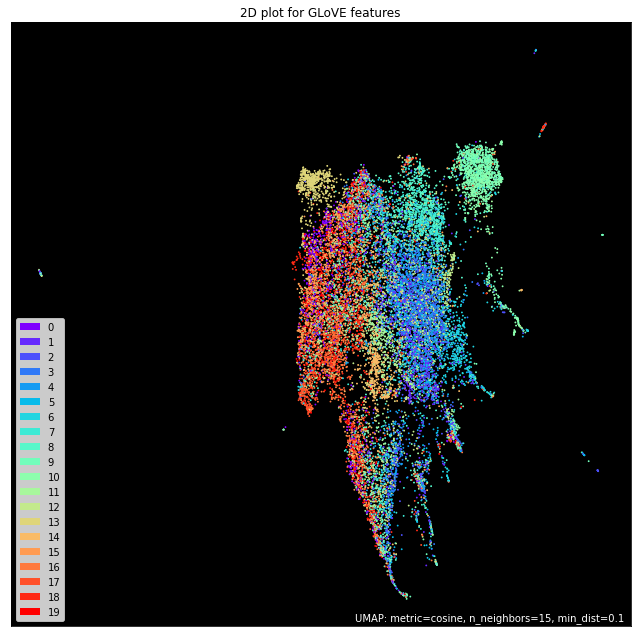

In [5]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

def transform_glove(data, model):
    dim = len(model.get_vector("king"))

    X = np.zeros((len(data), dim))
    n = 0
    for sentence in data:
        tokens = sentence.split()
        vecs = []
        for word in tokens:
            try:
                vec = model.get_vector(word)
                vecs.append(vec)
            except KeyError:
                pass
        if len(vecs) > 0:
            vecs = np.array(vecs)
            X[n] = vecs.mean(axis=0)
        n += 1
    
    return X

glove_name = 'glove.6B.300d.txt'
word2vec_output_file = glove_name +'.word2vec'
glove2word2vec(glove_name, word2vec_output_file)
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)        

dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
glove_transformed = transform_glove(dataset.data, model)

dim_embedding = umap.UMAP(n_components=2, metric='cosine').fit(glove_transformed)

f = umap.plot.points(dim_embedding, labels=np.array(dataset.target), theme='fire')
plt.title('2D plot for GLoVE features')
plt.show()

## BERT

In [ ]:
import torch
import transformers as ppb
import swifter

class BertTokenizer(object):

    def __init__(self, text=[]):
        self.text = text

        # For DistilBERT:
        self.model_class, self.tokenizer_class, self.pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

        # Load pretrained model/tokenizer
        self.tokenizer = self.tokenizer_class.from_pretrained(self.pretrained_weights)

        self.model = self.model_class.from_pretrained(self.pretrained_weights)

    def get(self):

        df = pd.DataFrame(data={"text":self.text})
        tokenized = df["text"].swifter.apply((lambda x: self.tokenizer.encode(x, add_special_tokens=True)))

        max_len = 0
        for i in tokenized.values:
            if len(i) > max_len:
                max_len = len(i)

        padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = torch.tensor(padded)
        attention_mask = torch.tensor(attention_mask)

        with torch.no_grad(): last_hidden_states = self.model(input_ids, attention_mask=attention_mask)
        
        features = last_hidden_states[0][:, 0, :].numpy()

        return features

dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))

_instance =BertTokenizer(text = dataset.data)
tokens = _instance.get()

umap_20 = umap.UMAP(n_components=200, metric='cosine')
words_count_umap = umap_20.fit_transform(tokens)

kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
dbs = kmeans20.fit_predict(words_count_umap)

print(adjusted_rand_score(dataset.target, dbs))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Pandas Apply:   0%|          | 0/18846 [00:00<?, ?it/s]

## Gaussuian Mixture Models

In [35]:
umap_20 = umap.UMAP(n_components=200, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=20)
result = gmm.fit_predict(words_count_umap)

print(adjusted_rand_score(dataset.target, result))

0.4152672331773858


## SOM

In [10]:
from sklearn_som.som import SOM

dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))

count_vec = CountVectorizer(stop_words="english", min_df=5)
tfidf_tranformer = TfidfTransformer(use_idf=True)

word_count_vec = count_vec.fit_transform(dataset.data)
word_count_vec_tf = tfidf_tranformer.fit_transform(word_count_vec)
word_count_array = word_count_vec_tf.toarray()
word_counts = pd.DataFrame(data=word_count_array, columns = count_vec.get_feature_names())

umap_20 = umap.UMAP(n_components=200, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)

iris_som = SOM(m=200, n=200, dim=200)
predictions = iris_som.fit_predict(words_count_umap)

print(adjusted_rand_score(dataset.target, predictions))

0.2377693005090737


## Cluster Ensembles

In [7]:
umap_20 = umap.UMAP(n_components=200, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)

kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
dbs = kmeans20.fit_predict(words_count_umap)
dbs = np.atleast_2d(dbs).T
dbs = np.atleast_2d(dbs).T

gmm = GaussianMixture(n_components=20)
result = gmm.fit_predict(words_count_umap)
result = np.atleast_2d(result).T
result = np.atleast_2d(result).T
dbs = np.append(dbs,result,axis= 0)

result = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(words_count_umap)
result = gmm.fit_predict(words_count_umap)
result = np.atleast_2d(result).T
result = np.atleast_2d(result).T
dbs = np.append(dbs,result,axis= 0)

umap_20 = umap.UMAP(n_components=20, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)
kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
result = kmeans20.fit_predict(words_count_umap)
result = np.atleast_2d(result).T
result = np.atleast_2d(result).T
dbs = np.append(dbs,result,axis= 0)

umap_20 = umap.UMAP(n_components=5, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)
kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
result = kmeans20.fit_predict(words_count_umap)
result = np.atleast_2d(result).T
result = np.atleast_2d(result).T
dbs = np.append(dbs,result,axis= 0)

import ClusterEnsembles as CE
consensus_clustering_labels = CE.cluster_ensembles(dbs, verbose = True, N_clusters_max = 50)

print(adjusted_rand_score(dataset.target, consensus_clustering_labels))

0.4630521505516385


## Normalization

In [4]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
word_counts_s = scalar.fit_transform(word_counts)
umap_20 = umap.UMAP(n_components=200, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts_s)

kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
result = kmeans20.fit_predict(words_count_umap)

print(adjusted_rand_score(dataset.target, result))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


0.4735358493744088


In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
word_counts_s = scalar.fit_transform(word_counts)
umap_20 = umap.UMAP(n_components=200, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts_s)
words_count_umap_s = scalar.fit_transform(words_count_umap)
kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
result = kmeans20.fit_predict(words_count_umap_s)

print(adjusted_rand_score(dataset.target, result))

0.5114313619252064


# Only Nouns

In [11]:
nonnouns = []
for sent in dataset.data:
    ns = [token for token, pos in pos_tag(word_tokenize(sent)) if not pos.startswith('N')]
    nonnouns = nonnouns + ns

nonnouns = list(set(nonnouns))

count_vec = CountVectorizer(stop_words="english", min_df=3)
word_count_vec = count_vec.fit_transform(dataset.data)
count_vec = CountVectorizer(stop_words=nonnouns, min_df=3)
word_count_vec = count_vec.fit_transform(dataset.data)
word_count_vec_tf = tfidf_tranformer.fit_transform(word_count_vec)
word_count_array = word_count_vec_tf.toarray()
word_counts = pd.DataFrame(data=word_count_array, columns = count_vec.get_feature_names())

umap_20 = umap.UMAP(n_components=20, metric='cosine')
words_count_umap = umap_20.fit_transform(word_counts)

kmeans20 = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
dbs = kmeans20.fit_predict(words_count_umap)

print(adjusted_rand_score(dataset.target, dbs))

0.24678884808114995
